## Author: Anuj Sachdeva

## Project : Ensemble techniques

• DOMAIN: Telecom

• CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can
analyse all relevant customer data and develop focused customer retention programs.

• DATA DESCRIPTION: Each row represents a customer, each column contains customer’s attributes described on the column
Metadata. The data set includes information about:

    • Customers who left within the last month – the column is called Churn

    • Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

    • Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

    • Demographic info about customers – gender, age range, and if they have partners and dependents

• PROJECT OBJECTIVE: Build a model that will help to identify the potential customers who have a higher probability to churn.
This help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising
customer retention.

### Install the necessary libraries

In [35]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score

from scipy.stats import zscore
from scipy import stats
from sklearn import metrics

In [36]:
# !pip install -U --user missingno

In [37]:
# !pip install -U --user pandas_profiling

In [38]:
# import pandas_profiling ## For easy profiling of pandas DataFrame
# import missingno as msno ## Missing value co-occurance analysis

### 1.1. - Import and warehouse data:

### 1.1.1. - Import all the given datasets from MYSQL server. Explore shape and size

In [39]:
Tel_Customer_Churn1 = pd.read_csv('TelcomCustomer-Churn_1.csv')
print('Tel_Customer_Churn1 shape is : {}'.format(Tel_Customer_Churn1.shape))
Tel_Customer_Churn2 = pd.read_csv('TelcomCustomer-Churn_2.csv')
print('Tel_Customer_Churn2 shape is : {}'.format(Tel_Customer_Churn2.shape))

Tel_Customer_Churn1 shape is : (7043, 10)
Tel_Customer_Churn2 shape is : (7043, 11)


In [40]:
Tel_Customer_Churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


In [41]:
Tel_Customer_Churn2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OnlineBackup      7043 non-null   object 
 1   DeviceProtection  7043 non-null   object 
 2   TechSupport       7043 non-null   object 
 3   StreamingTV       7043 non-null   object 
 4   StreamingMovies   7043 non-null   object 
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   PaymentMethod     7043 non-null   object 
 8   MonthlyCharges    7043 non-null   float64
 9   TotalCharges      7043 non-null   object 
 10  Churn             7043 non-null   object 
dtypes: float64(1), object(10)
memory usage: 605.4+ KB


#### Observation per Info command

1) Tel_Customer_Churn1 and Tel_Customer_Churn2 are having same number of rows but different set of columns

2) Total number of rows in both the datasets are 7043

3) Total number of columns in Tel_Customer_Churn1 are 10

customerID, gender, SeniorCitizen, Partner,  Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, 

4) Total number of columns in Tel_Customer_Churn2 are 11

OnlineBackup, DeviceProtection, TechSupport , StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn 

### 1.1.2. - Merge all datasets onto one and explore final shape and size.

In [42]:
Tel_Customer_Churn = pd.merge(Tel_Customer_Churn1, Tel_Customer_Churn2, left_index=True, right_index=True)
Tel_Customer_Churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
Tel_Customer_Churn_bk = Tel_Customer_Churn.copy()

In [47]:
Tel_Customer_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### From info command, below are the observations:

1) All the columns are having non nulls

2) 7043 rows in the dataset

3) SeniorCitizen and tenure are Int

4) MonthlyCharges is Float

5) All the other columsn except SeniorCitizen, tenure and MonthlyCharges are Object

In [48]:
Tel_Customer_Churn.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,6311-UEUME,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2. Data cleansing:

### 1.2.1. - Missing value treatment 

In [49]:
#Checking the presence of any null values
Tel_Customer_Churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [50]:
# Different method to check the NUll values where the data type is bool
Tel_Customer_Churn.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

#### No NULL values in the dataset

### 1.2.2. - Convert categorical attributes to continuous using relevant functional knowledge

In [51]:
Tel_Customer_Churn.info() # many columns are of type object i.e. strings. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [52]:
Tel_Customer_Churn.TotalCharges.describe(include='all')

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

#### From above, Data type of the TotalCharges is object which is not correct. It should be FLoat

In [53]:
# Checking if any nulls are present in the TotalCharges column
Tel_Customer_Churn.TotalCharges.isnull().any()

False

In [54]:
# numerical columns

num_columns = ['TotalCharges','MonthlyCharges','tenure']

In [46]:
for feature in Tel_Customer_Churn[num_columns].columns:
    print('*******','Column name:',feature,'*******')
    
    print('Min values:',Tel_Customer_Churn[feature].min())
    print('Max values:',Tel_Customer_Churn[feature].max())
    
    print('***********-end-***********')
    print('\n')

******* Column name: TotalCharges *******
Min values:  
Max values: 999.9
***********-end-***********


******* Column name: MonthlyCharges *******
Min values: 18.25
Max values: 118.75
***********-end-***********


******* Column name: tenure *******
Min values: 0
Max values: 72
***********-end-***********




**Observation:**
- From above we can see that TotalCharges is minimum value is space

In [16]:
Tel_Customer_Churn[Tel_Customer_Churn['TotalCharges'] == ' '] # check if the rows are having Spaces

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#### 11 rows are with TotalCharges as spaces 

In [17]:
Tel_Customer_Churn.TotalCharges = Tel_Customer_Churn.TotalCharges.replace([' '],0) # Replacing the spaces with zeroes
Tel_Customer_Churn.TotalCharges = Tel_Customer_Churn.TotalCharges.astype(float) # changing the datatype to Float
print(Tel_Customer_Churn.TotalCharges.median()) # checking the median

1394.55


In [18]:
# Checking the TotalCharges columns again to check if the datatype is changed to float
Tel_Customer_Churn.TotalCharges.describe(include='all')

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [19]:
Tel_Customer_Churn[Tel_Customer_Churn['TotalCharges'] ==  ' '] # Again check if the rows are having Spaces in the TotalCharges column

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


#### No rows are having Spaces

In [20]:
Tel_Customer_Churn[Tel_Customer_Churn.TotalCharges == 0] # Check if the rows are having Zeroes in the TotalCharges column

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


#### 11 Rows are present with TotalCharges as Zeroes now as we have updated the rows from Spaces to zero now

#### We can see that the current mean of the TotalCharges is 1394.55 and lets replace the zeroes with median

In [21]:
Tel_Customer_Churn.TotalCharges = Tel_Customer_Churn.TotalCharges.replace(0,Tel_Customer_Churn.TotalCharges.median())

In [22]:
Tel_Customer_Churn[Tel_Customer_Churn.TotalCharges == 0] # Again check if the rows are having Zero now

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


#### No rows are present with TotalCharges as zeroes now

In [23]:
Tel_Customer_Churn.TotalCharges.describe(include='all')

count    7043.000000
mean     2281.912360
std      2265.272185
min        18.800000
25%       402.225000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

#### Meadian is still the same after replacing the zero with median value

In [24]:
Tel_Customer_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
Tel_Customer_Churn.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,6311-UEUME,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Datatype of the TotalCharges is now changed to float which is expected

In [26]:
for col in Tel_Customer_Churn.columns: # Loop through all columns in the dataframe
    if Tel_Customer_Churn[col].dtype == 'object': # Only apply for columns with categorical strings
        Tel_Customer_Churn[col] = pd.Categorical(Tel_Customer_Churn[col])# Replace strings with an integer
Tel_Customer_Churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Lets convert the columns with an 'object' datatype into categorical variables

In [27]:
Tel_Customer_Churn.info() # check the dataype of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [28]:
for col in Tel_Customer_Churn.columns:
    if Tel_Customer_Churn[col].dtype == 'int64' or Tel_Customer_Churn[col].dtype == 'float64':
        continue
    else:
        print("Column name : {}".format(col))
        print(Tel_Customer_Churn[col].value_counts())
        print()

Column name : customerID
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customerID, Length: 7043, dtype: int64

Column name : gender
Male      3555
Female    3488
Name: gender, dtype: int64

Column name : Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

Column name : Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64

Column name : PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64

Column name : MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Column name : InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Column name : OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

Column name : Onlin

In [29]:
# Create a structure for replace for categorical variables

replaceStruct = {
                "gender":           {"Male": 1, "Female": 2},
                "Partner":          {"No": 0, "Yes": 1 },
                "Dependents":       {"No": 0, "Yes": 1 },
                "PhoneService":     {"No": 0, "Yes": 1 },
                "MultipleLines":    {"No phone service": -1, "No": 0, "Yes": 1},
                "InternetService":  {"No": 0, "DSL": 1, "Fiber optic": 2},
                "OnlineSecurity":   {"No internet service": -1, "No": 0, "Yes": 1 },
                "OnlineBackup":     {"No internet service": -1, "No": 0, "Yes": 1 },
                "DeviceProtection": {"No internet service": -1, "No": 0, "Yes": 1 },
                "TechSupport":      {"No internet service": -1, "No": 0, "Yes": 1 },
                "StreamingTV":      {"No internet service": -1, "No": 0, "Yes": 1 },
                "StreamingMovies":  {"No internet service": -1, "No": 0, "Yes": 1 },
                "PaperlessBilling": {"No": 0, "Yes": 1 },
                "Churn":            {"No": 0, "Yes": 1 },
                    }

In [30]:
Tel_Customer_Churn=Tel_Customer_Churn.replace(replaceStruct)
Tel_Customer_Churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,2,0,1,0,1,0,-1,1,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,-1,1,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2,0,0,0,2,1,0,2,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [31]:
Tel_Customer_Churn.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,0002-ORFBO,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043.0,NaN,NaN,NaN,1.495244,0.500013,1.0,1.0,1.0,2.0,2.0
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043.0,NaN,NaN,NaN,0.483033,0.499748,0.0,0.0,0.0,1.0,1.0
Dependents,7043.0,NaN,NaN,NaN,0.299588,0.45811,0.0,0.0,0.0,1.0,1.0
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043.0,NaN,NaN,NaN,0.903166,0.295752,0.0,1.0,1.0,1.0,1.0
MultipleLines,7043.0,NaN,NaN,NaN,0.325004,0.64273,-1.0,0.0,0.0,1.0,1.0
InternetService,7043.0,NaN,NaN,NaN,1.222916,0.778877,0.0,1.0,1.0,2.0,2.0
OnlineSecurity,7043.0,NaN,NaN,NaN,0.069999,0.706051,-1.0,0.0,0.0,1.0,1.0


#### We have changed the categorical variables into Continous variables. For Contract and PaymentMethod, we will do the one hot encoding before the Model creation

### 1.2.3. - Drop attribute/s if required using relevant functional knowledge

#### customerID column is not related to any of the other columns in the dataset. It is just an ID to indentify the Telecom customer

In [32]:
Tel_Customer_Churn.drop(['customerID'],axis=1,inplace=True)

In [33]:
Tel_Customer_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   int64   
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   int64   
 3   Dependents        7043 non-null   int64   
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   int64   
 6   MultipleLines     7043 non-null   int64   
 7   InternetService   7043 non-null   int64   
 8   OnlineSecurity    7043 non-null   int64   
 9   OnlineBackup      7043 non-null   int64   
 10  DeviceProtection  7043 non-null   int64   
 11  TechSupport       7043 non-null   int64   
 12  StreamingTV       7043 non-null   int64   
 13  StreamingMovies   7043 non-null   int64   
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   int64   
 16  PaymentMethod     7043 n

In [34]:
print('Tel_Customer_Churn shape is : {}'.format(Tel_Customer_Churn.shape))

Tel_Customer_Churn shape is : (7043, 20)


#### Earlier the number of columns were 21 and now after removal it is 20

### 1.2.4. - Automate all the above steps

#### Created few functions to automate the processing
- **missing_values_summary** : For sharing the missing value summary of all the columns
- **get_categorical_columns** : For getting the categoricals columns present int he dataset
- **dummify_categorical_features** : Function to create the dummies by just giving the Dataframe and column names
- **print_dataunique**: function to get the 5 unique values from that column

In [44]:
Tel_Customer_Churn_bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [55]:
def missing_values_summary(df, observations=False):
    '''
    
    '''
    
    # If observations=True, calculate the number of observations that have the
    # same amount of missing values.
    if observations:
        num_columns_missing = df.isnull().sum(axis=1).value_counts().sort_index()
        
    # Calculate the number of missing values for each attribute.
    else:
        # Using `isnull()` and `notnull()` we can calculate the number of missing values and non-null values.
        nulls = df.isnull().sum()
        non_nulls = df.notnull().sum()

        # Add missing values and non-null values together to get the total number values in each column.
        total_values = nulls + non_nulls

        # Create a variable to store the percentage of missing values in each column.
        pct_missing = (nulls/total_values)
    
    # If observations=True: Return groups of observations with the same number of missing values.
    if observations:
        df = pd.DataFrame({'num_cols_missing': num_columns_missing.index,
                           'pct_cols_missing': (num_columns_missing.values/df.shape[0]) * 100,
                           'num_rows': df.isnull().sum(axis=1).value_counts().sort_index()
                          }).reset_index(drop=True)
    # Else: Return the number of missing values for each attribute.
    else:
        df = pd.DataFrame({'attribute':pct_missing.index.values,
                           'num_rows_missing':nulls.values,
                           'pct_rows_missing':pct_missing.values
                          })
    return df

In [56]:
missing_values_summary(Tel_Customer_Churn_bk)

,attribute,num_rows_missing,pct_rows_missing
0,customerID,0,0.0
1,gender,0,0.0
2,SeniorCitizen,0,0.0
3,Partner,0,0.0
4,Dependents,0,0.0
5,tenure,0,0.0
6,PhoneService,0,0.0
7,MultipleLines,0,0.0
8,InternetService,0,0.0
9,OnlineSecurity,0,0.0


#### As displayed by the fucntion no missing values in the dataset.

In [57]:
def get_categorical_columns(dataframe):
    """
    To get list of all the categorical columns
    """
    all_columns = dataframe.columns
    numeric_cols = dataframe._get_numeric_data().columns
    return list(set(all_columns) - set(numeric_cols))

In [58]:
get_categorical_columns(Tel_Customer_Churn_bk)

['Churn',
 'gender',
 'StreamingTV',
 'TechSupport',
 'TotalCharges',
 'customerID',
 'Dependents',
 'PaperlessBilling',
 'StreamingMovies',
 'DeviceProtection',
 'InternetService',
 'PaymentMethod',
 'Contract',
 'MultipleLines',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'Partner']

In [71]:
# Function to create the dummies by just giving the Dataframe and column names
def dummify_categorical_features(data, columns):
    dummified_data = pd.get_dummies(data, columns = columns, drop_first=True)
    return dummified_data

In [72]:
oneHotCols1=["Contract","PaymentMethod"]
dummify_categorical_features(Tel_Customer_Churn_bk,oneHotCols1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Yes,29.85,29.85,No,0,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,56.95,1889.5,No,1,0,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Yes,53.85,108.15,Yes,0,0,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,42.30,1840.75,No,1,0,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Yes,70.70,151.65,Yes,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,84.80,1990.5,No,1,0,0,0,1
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,103.20,7362.9,No,1,0,1,0,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,Yes,29.60,346.45,No,0,0,0,1,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,Yes,74.40,306.6,Yes,0,0,0,0,1


In [73]:
def print_dataunique(df):
    '''
    Function to print unique information for each column in a python dataframe
    Required Input - 
        - df = Pandas DataFrame
    Expected Output -
        - Column name
        - Data type of that column
        - Number of unique values in that column
        - 5 unique values from that column
    '''
    counter = 0
    for i in df.columns:
        x = df.loc[:, i].unique()
        print(counter, i, type(df.loc[0, i]), len(x), x[0:5])
        counter += 1

In [74]:
print_dataunique(Tel_Customer_Churn_bk)

0 customerID <class 'str'> 7043 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' '7795-CFOCW' '9237-HQITU']
1 gender <class 'str'> 2 ['Female' 'Male']
2 SeniorCitizen <class 'numpy.int64'> 2 [0 1]
3 Partner <class 'str'> 2 ['Yes' 'No']
4 Dependents <class 'str'> 2 ['No' 'Yes']
5 tenure <class 'numpy.int64'> 73 [ 1 34  2 45  8]
6 PhoneService <class 'str'> 2 ['No' 'Yes']
7 MultipleLines <class 'str'> 3 ['No phone service' 'No' 'Yes']
8 InternetService <class 'str'> 3 ['DSL' 'Fiber optic' 'No']
9 OnlineSecurity <class 'str'> 3 ['No' 'Yes' 'No internet service']
10 OnlineBackup <class 'str'> 3 ['Yes' 'No' 'No internet service']
11 DeviceProtection <class 'str'> 3 ['No' 'Yes' 'No internet service']
12 TechSupport <class 'str'> 3 ['No' 'Yes' 'No internet service']
13 StreamingTV <class 'str'> 3 ['No' 'Yes' 'No internet service']
14 StreamingMovies <class 'str'> 3 ['No' 'Yes' 'No internet service']
15 Contract <class 'str'> 3 ['Month-to-month' 'One year' 'Two year']
16 PaperlessBilling <class 'str'> 

### 1.3. - Data analysis & visualisation

### 1.3.1. - Perform detailed statistical analysis on the data

In [35]:
Tel_Customer_Churn.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,NaN,NaN,NaN,1.49524,0.500013,1,1,1,2,2
SeniorCitizen,7043,NaN,NaN,NaN,0.162147,0.368612,0,0,0,0,1
Partner,7043,NaN,NaN,NaN,0.483033,0.499748,0,0,0,1,1
Dependents,7043,NaN,NaN,NaN,0.299588,0.45811,0,0,0,1,1
tenure,7043,NaN,NaN,NaN,32.3711,24.5595,0,9,29,55,72
PhoneService,7043,NaN,NaN,NaN,0.903166,0.295752,0,1,1,1,1
MultipleLines,7043,NaN,NaN,NaN,0.325004,0.64273,-1,0,0,1,1
InternetService,7043,NaN,NaN,NaN,1.22292,0.778877,0,1,1,2,2
OnlineSecurity,7043,NaN,NaN,NaN,0.0699986,0.706051,-1,0,0,1,1
OnlineBackup,7043,NaN,NaN,NaN,0.128212,0.738369,-1,0,0,1,1


In [36]:
Tel_Customer_Churn.skew()

gender              0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines      -0.422184
InternetService    -0.410327
OnlineSecurity     -0.099522
OnlineBackup       -0.207678
DeviceProtection   -0.205705
TechSupport        -0.105614
StreamingTV        -0.288858
StreamingMovies    -0.296405
PaperlessBilling   -0.375396
MonthlyCharges     -0.220524
TotalCharges        0.963792
Churn               1.063031
dtype: float64

#### Observations from 5 point summary:

1) TotalCharges are right skeyed

2) MonthlyCharges is left skeyed

3) tenure is Normally Distributed

4) We cannot check the skewness of variables other than tenure, TotalCharges and MonthlyCharges because others are Categorical variables displayed in Int

5) Contract and PaymentMethod are Object variables and are having 3 and 4 unique values 

6) same be viewed in the Histograms below

**Positively skewed:** Most frequent values are low and tail is towards high values.

**Negatively skewed:** Most frequent values are high and tail is towards low values.

If **Mode< Median< Mean** then the distribution is positively skewed.

If **Mode> Median> Mean** then the distribution is negatively skewed.

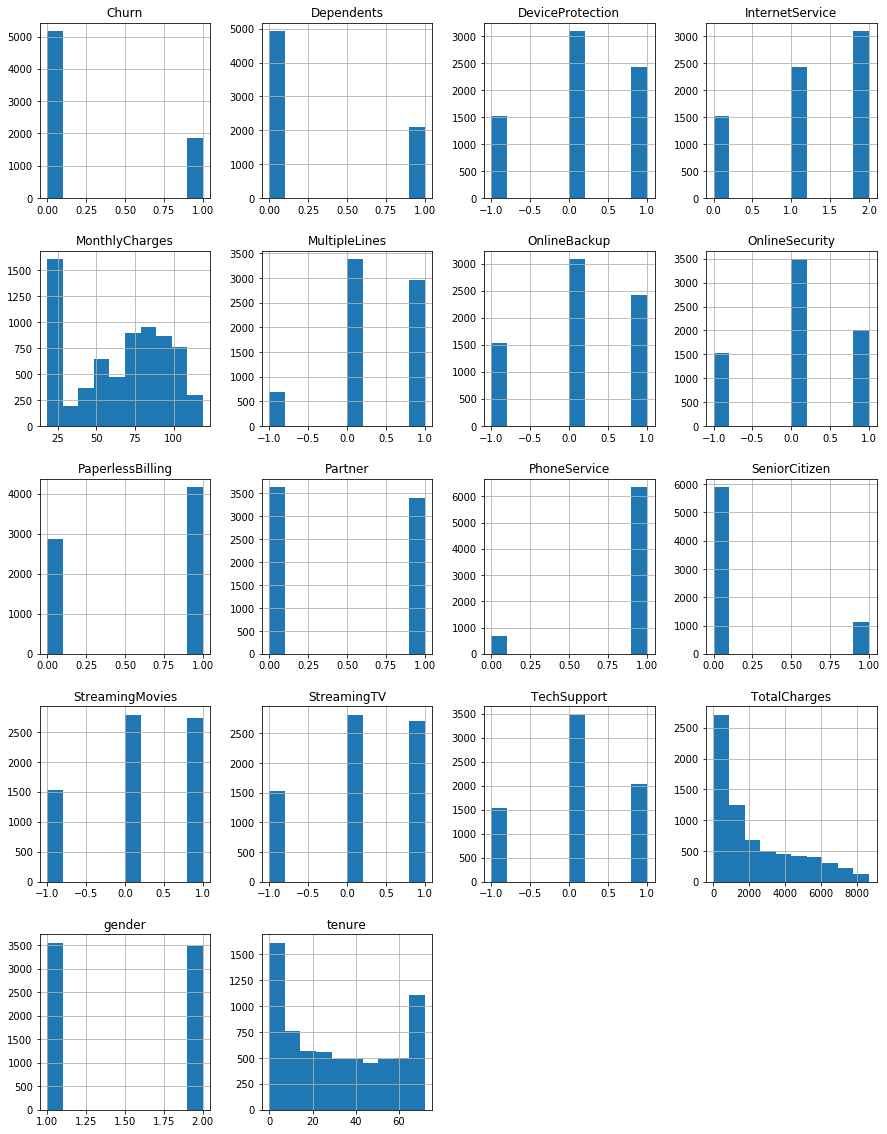

In [37]:
Tel_Customer_Churn.hist(figsize=(15,20));

#### From the above Histogram graph, we can see that below are the categorical fields in the dataset:

gender          
SeniorCitizen   
Partner         
Dependents                
PhoneService    
MultipleLines   
InternetService 
OnlineSecurity  
OnlineBackup    
DeviceProtection
TechSupport     
StreamingTV     
StreamingMovies 
Contract
PaperlessBilling 
PaymentMethod
Churn           
 

#### Quantative data:

MonthlyCharges - Left skeyed

TotalCharges - Right skeyed

tenure - Normally Distributed

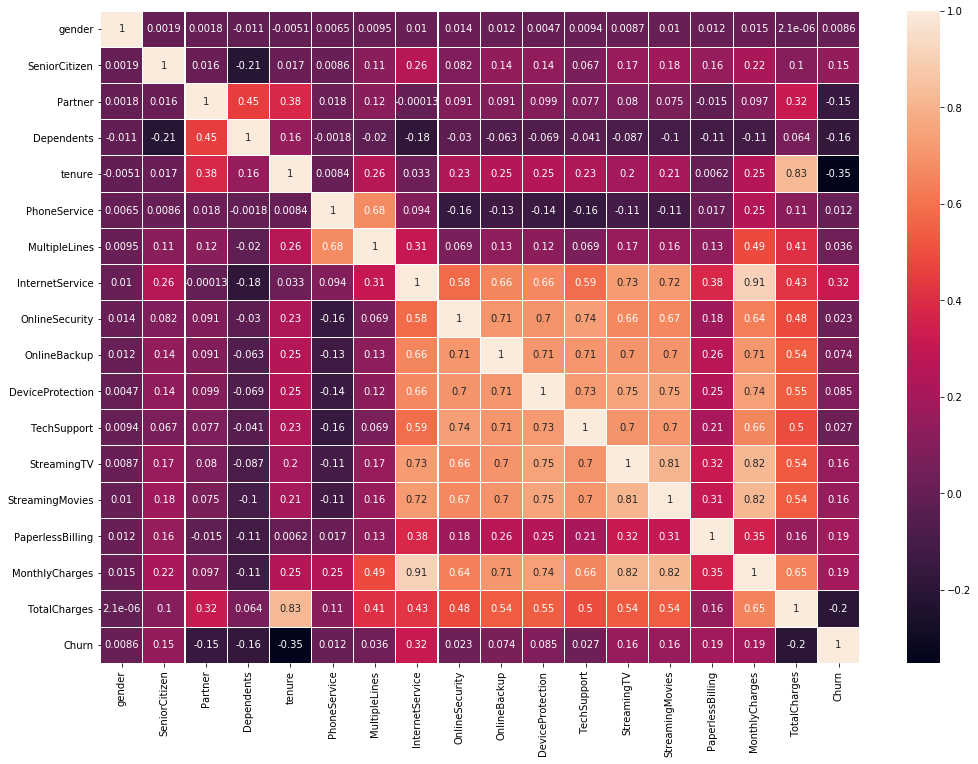

In [38]:
fig = plt.figure(figsize = (17,12))
sns.heatmap(Tel_Customer_Churn.corr(),annot=True,linewidths=.05);

**gender** - is not much corrrelated to any other variable 

**SeniorCitizen** is maximum correlated to InternetService and MonthlyCharges with values of .26 and .22 respectively.

**Partner** is maximum correlated to Dependents, tenure and TotalCharges with values of .45, .38 and .32 respectively.

**Dependents** is maximum correlated to Partner as mentioned above with a value of .45.

**tenure** is maximum correlated to TotalCharges and Partner with value of .83 and .38 respectively.

**PhoneService** is maximum correlated to MultipleLines with value of .68.

**MultipleLines** is maximum correlated to PhoneService and MonthlyCharges with value of .68 and .49 respectively.

**InternetService** is maximum correlated to MonthlyCharges with value of .91. it is also corrrelated with OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies etc

**OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies , MonthlyCharges** are correlated with each toher with values ranging from .58 to .82.

**PaperlessBilling** is maximum correlated to InternetService with value of .38.

**TotalCharges** is maximum correlated to tenure with value of .83. It is also correlated to OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies , MonthlyCharges ranging from .48 to .65

**Churn** is maximum correlated to InternetService with value of .38.


### 1.3.2. - Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis

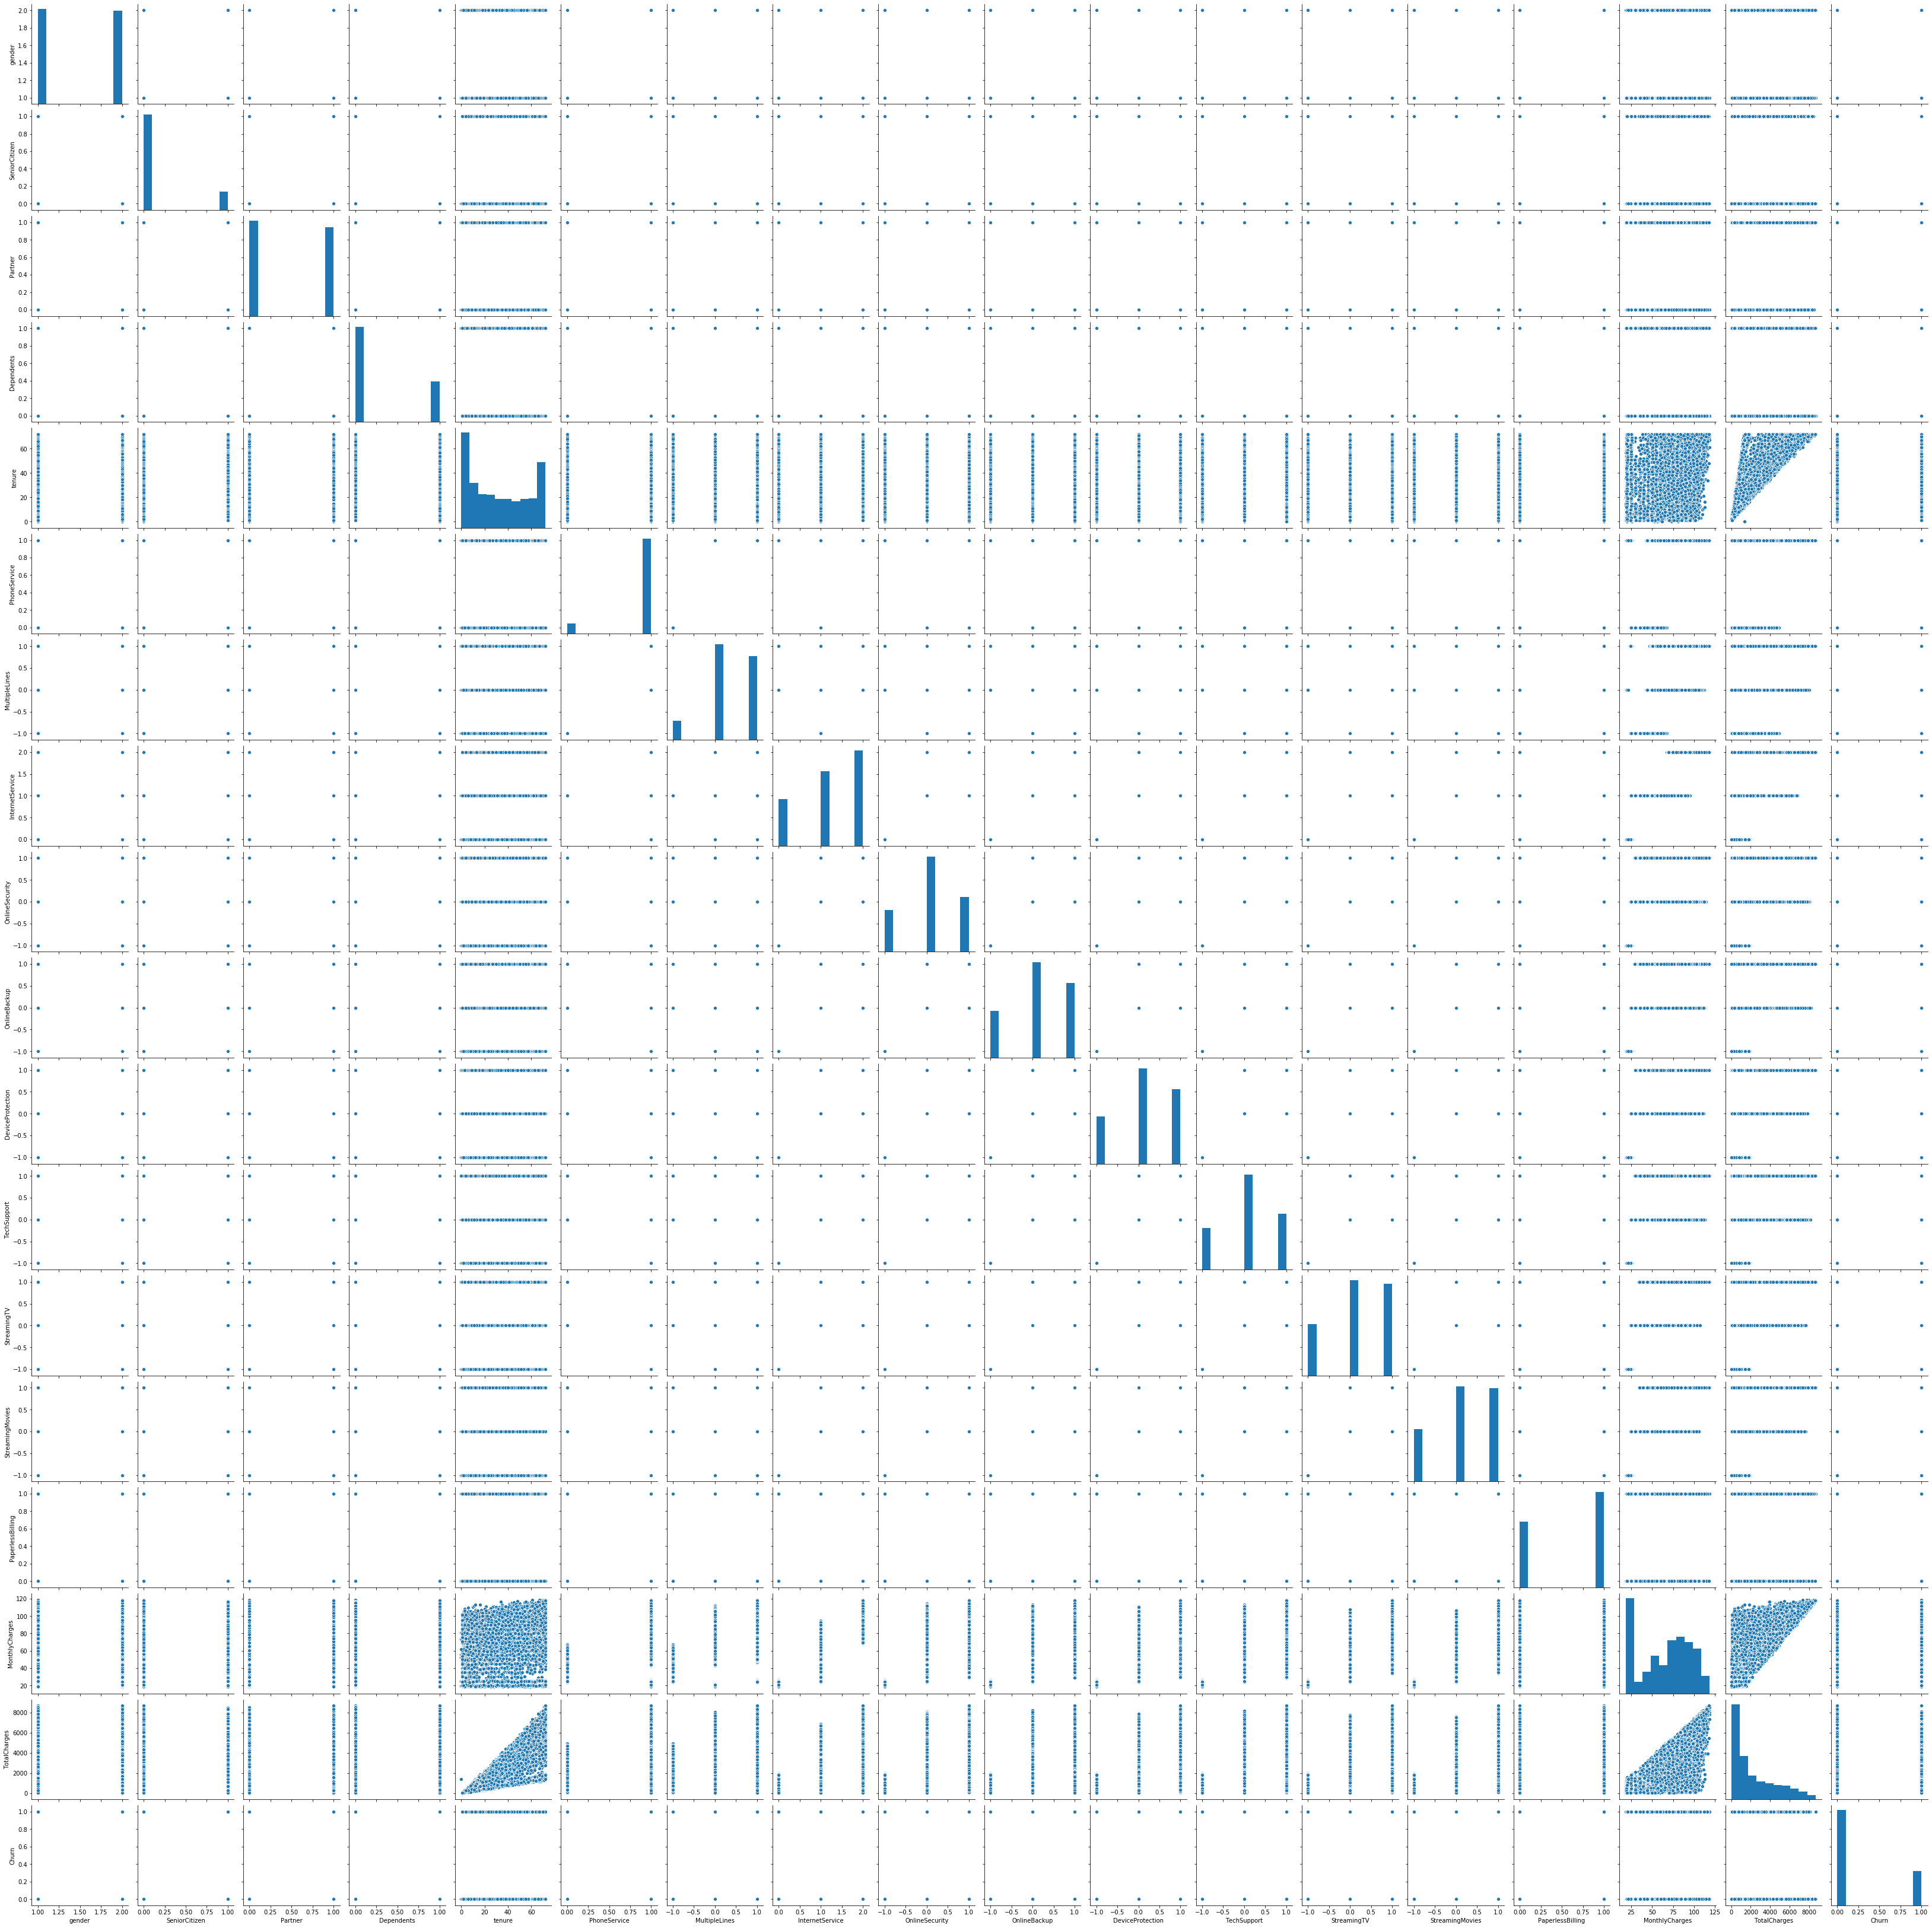

In [39]:
sns.pairplot(Tel_Customer_Churn);

#### Univariate Distribution plot of tenure, MonthlyCharges, TotalCharges

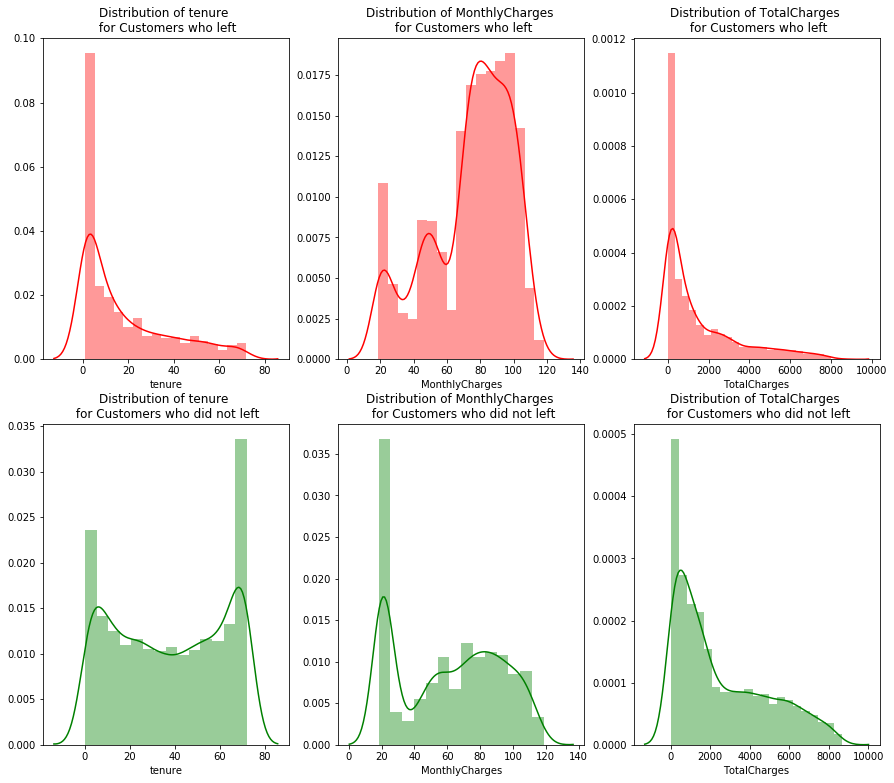

In [40]:
# Univariate boxplot of tenure, MonthlyCharges, TotalCharges with churn
fig = plt.figure(figsize = (15,13))
plt.subplot(2, 3, 1)
sns.distplot(Tel_Customer_Churn[Tel_Customer_Churn.Churn == 1].tenure,color = 'r')
plt.title("Distribution of tenure \n for Customers who left")
plt.subplot(2, 3, 2)
sns.distplot(Tel_Customer_Churn[Tel_Customer_Churn.Churn == 1].MonthlyCharges,color = 'r')
plt.title("Distribution of MonthlyCharges \n for Customers who left")
plt.subplot(2, 3, 3)
sns.distplot(Tel_Customer_Churn[Tel_Customer_Churn.Churn == 1].TotalCharges,color = 'r')
plt.title("Distribution of TotalCharges \n for Customers who left")
plt.subplot(2, 3, 4)
sns.distplot(Tel_Customer_Churn[Tel_Customer_Churn.Churn == 0].tenure,color = 'g')
plt.title("Distribution of tenure \n for Customers who did not left")
plt.subplot(2, 3, 5)
sns.distplot(Tel_Customer_Churn[Tel_Customer_Churn.Churn == 0].MonthlyCharges,color = 'g')
plt.title("Distribution of MonthlyCharges \n for Customers who did not left")
plt.subplot(2, 3, 6)
sns.distplot(Tel_Customer_Churn[Tel_Customer_Churn.Churn == 0].TotalCharges,color = 'g')
plt.title("Distribution of TotalCharges \n for Customers who did not left")
plt.show()

#### Observation from graph:

1) Distribution of tenure for Customers who left within the last month is right Skeyed. Basis on the Customer who left, Telecom company can target those customers whose tenure is between 0 to 5 because these could be the customers who might not be satisfied with the service and can leave the Network

2) Distribution of MonthlyCharges for Customers who left within the last month is left skeyed and the Customers whose MonthlyCharges are between 65 to 105 are more and these type of customers could be the Target ones for the telecom company to reach out to provide some discounts

3) Distribution of TotalCharges for Customers who left within the last month is right skeyed. Basis on the Customer who left, Telecom company can target those customers whoseTotalCharges are between 0 to 400 because these could be the customers who might not be satisfied with the service and can leave the Network

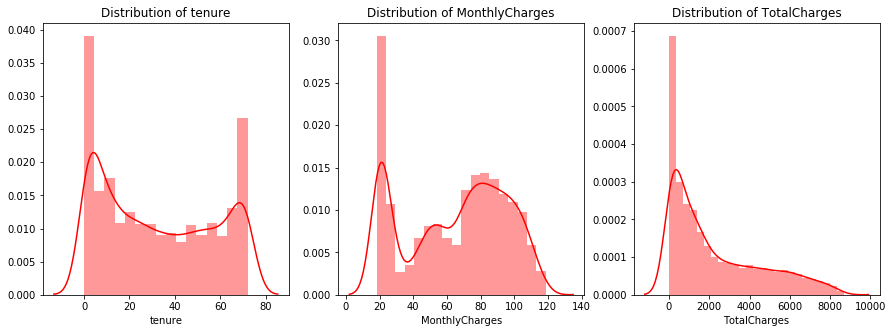

In [41]:
# Univariate boxplot of tenure, MonthlyCharges, TotalCharges without churn
fig = plt.figure(figsize = (15,5))
plt.subplot(1, 3, 1)
sns.distplot(Tel_Customer_Churn.tenure,color = 'r')
plt.title("Distribution of tenure")
plt.subplot(1, 3, 2)
sns.distplot(Tel_Customer_Churn.MonthlyCharges,color = 'r')
plt.title("Distribution of MonthlyCharges")
plt.subplot(1, 3, 3)
sns.distplot(Tel_Customer_Churn.TotalCharges,color = 'r')
plt.title("Distribution of TotalCharges")
plt.show()

#### Observations from distplot of Tenure, MonthlyCharges and TotalCharges:

1) Tenure distribution looks better and density is more at lower and higher side.

2) Customers whose monthly charges are more when considered less than 30. but most number of customer lies between 70-100.

3) Customers who pay total charges more than 2000 are few.

#### Univariate Boxplot of tenure, MonthlyCharges, TotalCharges

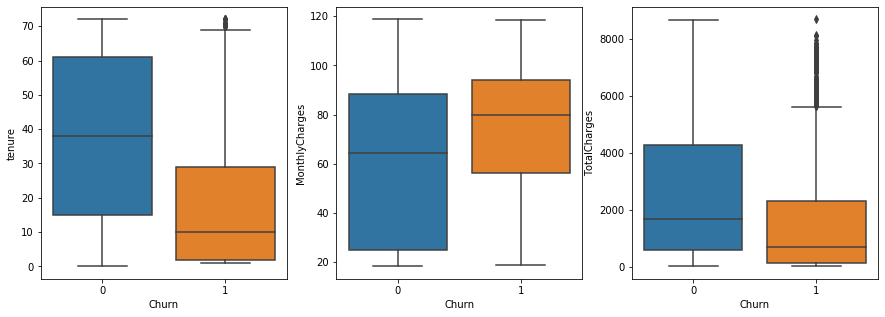

In [42]:
fig = plt.figure(figsize = (15,5))
plt.subplot(1, 3, 1)
sns.boxplot(data = Tel_Customer_Churn ,y='tenure', x='Churn')
plt.subplot(1, 3, 2)
sns.boxplot(data = Tel_Customer_Churn ,y='MonthlyCharges', x='Churn')
plt.subplot(1, 3, 3)
sns.boxplot(data = Tel_Customer_Churn , y='TotalCharges', x='Churn')
plt.show()

#### Observations from Boxplot of Tenure, MonthlyCharges and TotalCharges:

1) Customers opting for less tenure are more propable to churn.

2) Customers whose monthly charges are more propable to churn.

3) Customers who paying total charges less than 2000 are more probable to churn.

##### Below analysis is for Categorical valriables now

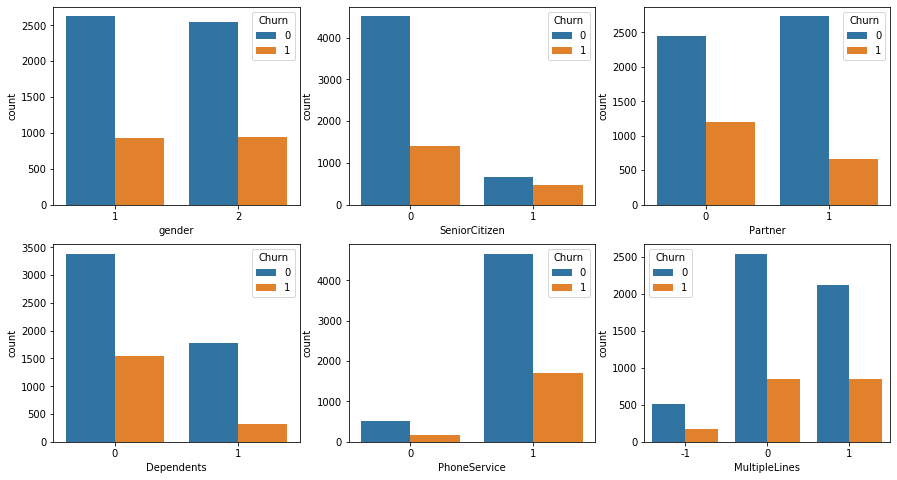

In [43]:
# Count Plot for gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines

fig = plt.figure(figsize = (15,8))
plt.subplot(2, 3, 1)
sns.countplot(Tel_Customer_Churn.gender, hue=Tel_Customer_Churn.Churn);

plt.subplot(2, 3, 2)
sns.countplot(Tel_Customer_Churn.SeniorCitizen, hue=Tel_Customer_Churn.Churn);

plt.subplot(2, 3, 3)
sns.countplot(Tel_Customer_Churn.Partner, hue=Tel_Customer_Churn.Churn);

plt.subplot(2, 3, 4)
sns.countplot(Tel_Customer_Churn.Dependents, hue=Tel_Customer_Churn.Churn);

plt.subplot(2, 3, 5)
sns.countplot(Tel_Customer_Churn.PhoneService, hue=Tel_Customer_Churn.Churn);

plt.subplot(2, 3, 6)
sns.countplot(Tel_Customer_Churn.MultipleLines, hue=Tel_Customer_Churn.Churn);

plt.show()

#### Observations on categorical variables with the help of Countplot: 

1) Churning of customers is almost same for both Male and Female

2) Churning of Customers is less when he/she is a senior citizen

3) Churning of Cusomters is less when they have partners

4) Churning of Cusomters is less when they have dependents

5) Churning of Cusomters is more when they have opted for phone services

6) Churning of Cusomters is almost same when they have opted for multiple lines or not

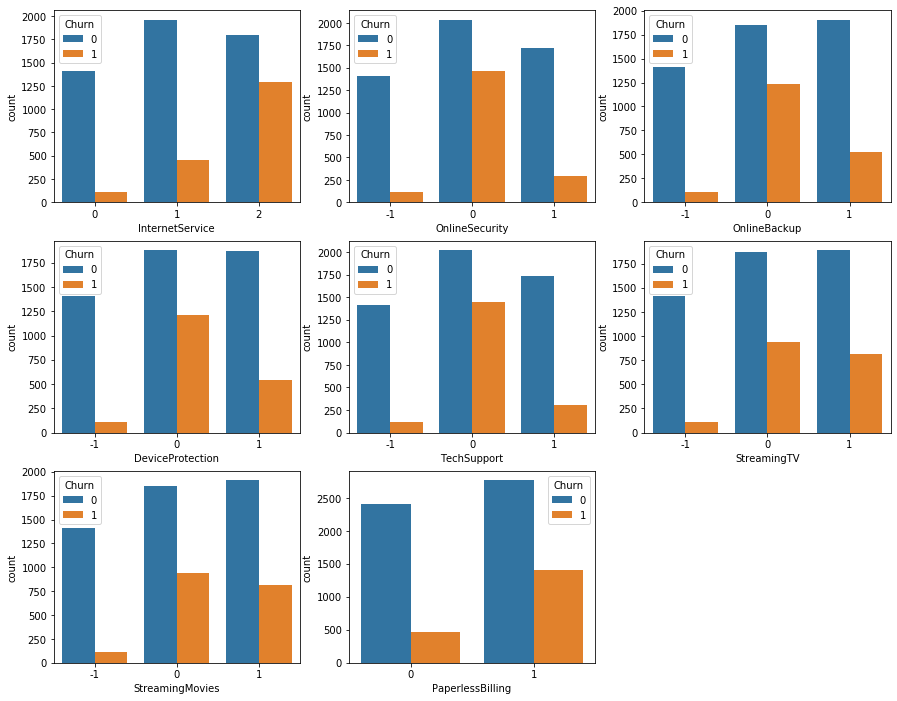

In [44]:
# Count Plot for InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling 

fig = plt.figure(figsize = (15,12))

plt.subplot(3, 3, 1)
sns.countplot(Tel_Customer_Churn.InternetService, hue=Tel_Customer_Churn.Churn);

plt.subplot(3, 3, 2)
sns.countplot(Tel_Customer_Churn.OnlineSecurity, hue=Tel_Customer_Churn.Churn);

plt.subplot(3, 3, 3)
sns.countplot(Tel_Customer_Churn.OnlineBackup, hue=Tel_Customer_Churn.Churn);

plt.subplot(3, 3, 4)
sns.countplot(Tel_Customer_Churn.DeviceProtection, hue=Tel_Customer_Churn.Churn);

plt.subplot(3, 3, 5)
sns.countplot(Tel_Customer_Churn.TechSupport, hue=Tel_Customer_Churn.Churn);

plt.subplot(3, 3, 6)
sns.countplot(Tel_Customer_Churn.StreamingTV, hue=Tel_Customer_Churn.Churn);

plt.subplot(3, 3, 7)
sns.countplot(Tel_Customer_Churn.StreamingMovies, hue=Tel_Customer_Churn.Churn);

plt.subplot(3, 3, 8)
sns.countplot(Tel_Customer_Churn.PaperlessBilling, hue=Tel_Customer_Churn.Churn);

plt.show()

#### Churning of customers is more when they have opted for Fiber optic and these could be the target customers tor each out to. because there could be issues related to Fiber optic which might not providing the good services to the customer

#### Churning of Customers is more when they have not opted for online security

#### Churning of Customers is more when they have not opted for online backup

#### Churning of Customers is more when they have not opted for device protection

#### Churning of Customers is more when they have not opted for device tech support

#### Churning of Customers is almost same when they have opted for Streaing Tv or not

#### Churning of Customers is almost same when they have opted for Streaing Movies or not

#### Churning of Customers is more when they have opted for paper less billing 

#### Churning of Customers is very less when they dont have the internet service

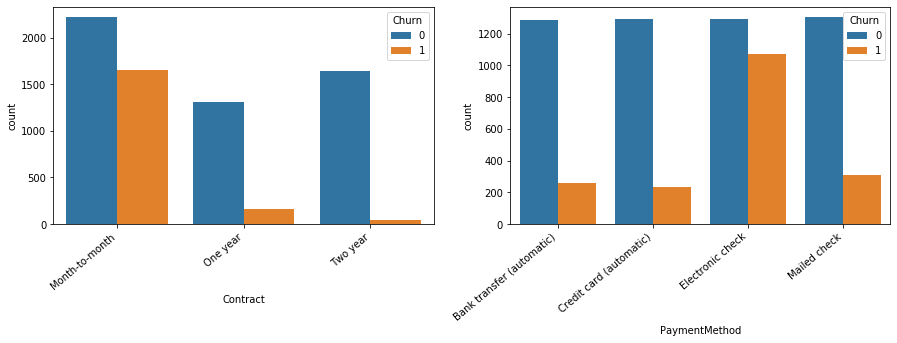

In [45]:
# Count Plot for Contract and PaymentMethod

fig = plt.figure(figsize = (15,4))

ax = plt.subplot(1, 2, 1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.countplot(Tel_Customer_Churn.Contract, hue=Tel_Customer_Churn.Churn, ax=ax);

ax = plt.subplot(1, 2, 2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.countplot(Tel_Customer_Churn.PaymentMethod, hue=Tel_Customer_Churn.Churn, ax=ax);

plt.show()

#### Churning of customers is more when the contract is month to month basis. Basis on the Customer who left, Telecom company can target those customers who have opted for month to month subscription these could be the customers who might not be satisfied with the service.

#### Churning of Customers is more when payment method is Electronic Check.  Basis on the Customer who left, Telecom company can target those customers who have opted for Electronic Check payment method these could be the customers who might be facing issues during the payment.

#### Churning of Customers is almost same when payment method is Bank transfer (automatic), Credit card (automatic) and Mailed check

#### Bivariate Analysis

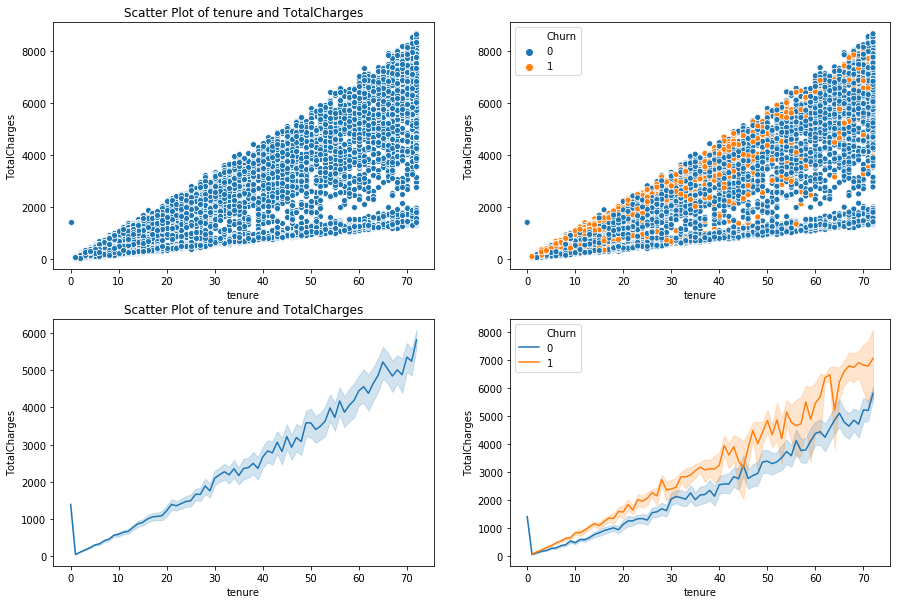

In [46]:
# Plotting the Scatter plot and lineplot for tenure and TotalCharges

fig = plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.scatterplot(Tel_Customer_Churn.tenure,Tel_Customer_Churn.TotalCharges)
plt.title("Scatter Plot of tenure and TotalCharges")
plt.subplot(2, 2, 2)
sns.scatterplot(Tel_Customer_Churn.tenure,Tel_Customer_Churn.TotalCharges,hue=Tel_Customer_Churn.Churn)
plt.subplot(2, 2, 3)
sns.lineplot(Tel_Customer_Churn.tenure,Tel_Customer_Churn.TotalCharges)
plt.title("Scatter Plot of tenure and TotalCharges")
plt.subplot(2, 2, 4)
sns.lineplot(Tel_Customer_Churn.tenure,Tel_Customer_Churn.TotalCharges,hue=Tel_Customer_Churn.Churn)
plt.show()

#### From the above charts, we can see that Tenure and TotalCharges are lineraly corelated with each other positiviely. It means that when tenure is increasing TotalCharges are also increasing.

#### At each specific value of the tenure, TotalCharges for the customer who left the telecom company are more than who are still with the telecom company

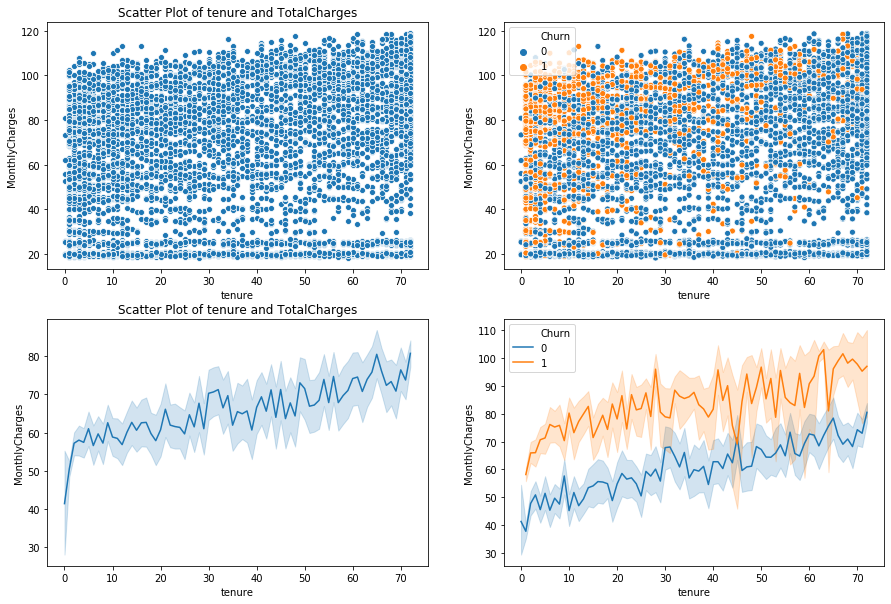

In [47]:
# Plotting the Scatter plot and lineplot for tenure and TotalCharges

fig = plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.scatterplot(Tel_Customer_Churn.tenure,Tel_Customer_Churn.MonthlyCharges)
plt.title("Scatter Plot of tenure and TotalCharges")
plt.subplot(2, 2, 2)
sns.scatterplot(Tel_Customer_Churn.tenure,Tel_Customer_Churn.MonthlyCharges,hue=Tel_Customer_Churn.Churn)
plt.subplot(2, 2, 3)
sns.lineplot(Tel_Customer_Churn.tenure,Tel_Customer_Churn.MonthlyCharges)
plt.title("Scatter Plot of tenure and TotalCharges")
plt.subplot(2, 2, 4)
sns.lineplot(Tel_Customer_Churn.tenure,Tel_Customer_Churn.MonthlyCharges,hue=Tel_Customer_Churn.Churn)
plt.show()

#### From the above charts, we can see that Tenure and MonthlyCharges are lineraly corelated with each other positiviely. It means that when tenure is increasing TotalCharges are also increasing but with small angle.

#### At each specific value of the tenure, MonthlyCharges for the customer who left the telecom company are more than who are still with the telecom company

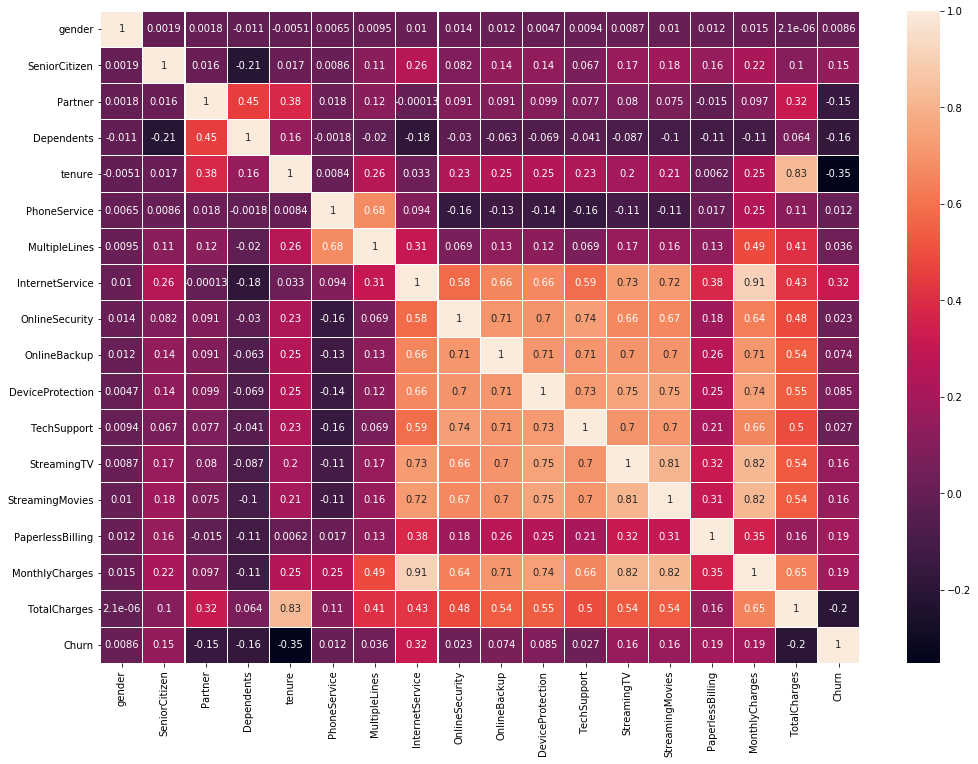

In [48]:
fig = plt.figure(figsize = (17,12))
sns.heatmap(Tel_Customer_Churn.corr(),annot=True,linewidths=.05);

**gender** - is not much corrrelated to any other variable 

**SeniorCitizen** is maximum correlated to InternetService and MonthlyCharges with values of .26 and .22 respectively.

**Partner** is maximum correlated to Dependents, tenure and TotalCharges with values of .45, .38 and .32 respectively.

**Dependents** is maximum correlated to Partner as mentioned above with a value of .45.

**tenure** is maximum correlated to TotalCharges and Partner with value of .83 and .38 respectively.

**PhoneService** is maximum correlated to MultipleLines with value of .68.

**MultipleLines** is maximum correlated to PhoneService and MonthlyCharges with value of .68 and .49 respectively.

**InternetService** is maximum correlated to MonthlyCharges with value of .91. it is also corrrelated with OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies etc

**OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies , MonthlyCharges** are correlated with each toher with values ranging from .58 to .82.

**PaperlessBilling** is maximum correlated to InternetService with value of .38.

**TotalCharges** is maximum correlated to tenure with value of .83. It is also correlated to OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies , MonthlyCharges ranging from .48 to .65

**Churn** is maximum correlated to InternetService with value of .38.


### Correlation of churn with respect to other features.

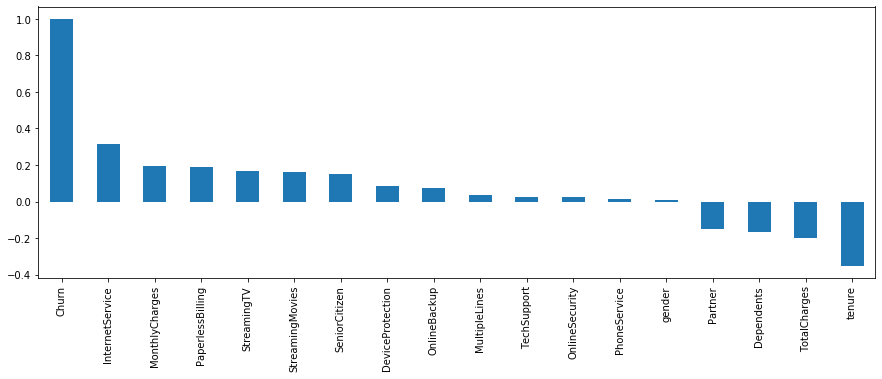

In [49]:
plt.figure(figsize=(15,5))
Tel_Customer_Churn.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

#### Observation :

1) There are few variables showing positive impact on churn out.

2) Gender is not influencing the churn out, also checked in bivariate and multivariate, behaviour is same in male and female.

3) There are other variables showing negative impct on churn out.

### Observation: Target Customers or potential customers who have a higher probability to churn

In [50]:
Target_Customers = Tel_Customer_Churn[Tel_Customer_Churn.Churn == 0]
# tenure
Target_Customers = Target_Customers[Target_Customers.tenure >= 0]
Target_Customers = Target_Customers[Target_Customers.tenure <= 5]
# MonthlyCharges
Target_Customers = Target_Customers[Target_Customers.MonthlyCharges >= 65]
Target_Customers = Target_Customers[Target_Customers.MonthlyCharges <= 105]
# TotalCharges
Target_Customers = Target_Customers[Target_Customers.TotalCharges >= 0]
Target_Customers = Target_Customers[Target_Customers.TotalCharges <= 400]
# Describe
Target_Customers.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,148,NaN,NaN,NaN,1.5,0.501698,1,1,1.5,2,2
SeniorCitizen,148,NaN,NaN,NaN,0.216216,0.413061,0,0,0,0,1
Partner,148,NaN,NaN,NaN,0.256757,0.438327,0,0,0,1,1
Dependents,148,NaN,NaN,NaN,0.135135,0.343029,0,0,0,0,1
tenure,148,NaN,NaN,NaN,2.62162,1.26386,1,2,3,3.25,5
PhoneService,148,NaN,NaN,NaN,1,0,1,1,1,1,1
MultipleLines,148,NaN,NaN,NaN,0.216216,0.413061,0,0,0,0,1
InternetService,148,NaN,NaN,NaN,1.89189,0.311571,1,2,2,2,2
OnlineSecurity,148,NaN,NaN,NaN,0.155405,0.363521,0,0,0,0,1
OnlineBackup,148,NaN,NaN,NaN,0.209459,0.408305,0,0,0,0,1


#### From the describe command, Below are the observations:

#### Total target Customers are 148 which can be reached to understand if they are getting any issues or not. 

#### Out of 148, Frequencey of Month-to-month Customer is 145 which is good as per the analysis.

#### Out of 148, Frequencey of Electronic check	payment method Customer is 95.

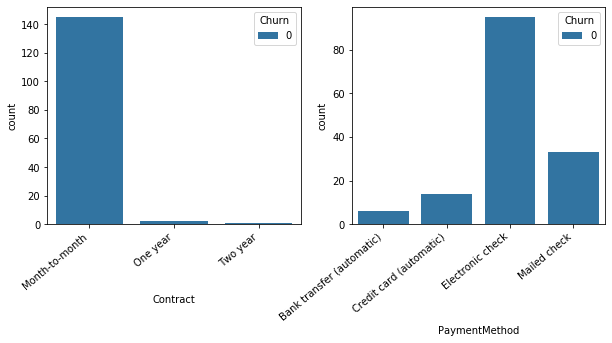

In [51]:
# Count Plot for Contract and PaymentMethod

fig = plt.figure(figsize = (10,4))

ax = plt.subplot(1, 2, 1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.countplot(Target_Customers.Contract, hue=Target_Customers.Churn, ax=ax);

ax = plt.subplot(1, 2, 2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.countplot(Target_Customers.PaymentMethod, hue=Target_Customers.Churn, ax=ax);

plt.show()

#### From the above chart, below are the obeservations:

#### Entries of Month-to-Month Contract is more in comprison to others

#### Electronic payment method entires are also more in comparison to others

### 1.4. - Data pre-processing:

#### Before creating the model or segregaitng the predictors and target, We will do the one hot encoding for Contract and PaymentMethod

In [49]:
oneHotCols=["Contract","PaymentMethod"]
Tel_Customer_Churn = pd.get_dummies(Tel_Customer_Churn, columns=oneHotCols)
Tel_Customer_Churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,2,0,1,0,1,0,-1,1,0,1,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,...,56.95,1889.50,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,-1,1,1,0,...,42.30,1840.75,0,0,1,0,1,0,0,0
4,2,0,0,0,2,1,0,2,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


In [50]:
print('Tel_Customer_Churn shape is : {}'.format(Tel_Customer_Churn.shape))

Tel_Customer_Churn shape is : (7043, 25)


#### From above, we can see that the shape is chnaged from (7043, 20) to (7043, 25) now.

In [51]:
Tel_Customer_Churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   InternetService                          7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 no

#### 7 new columns are added in place of Contract and PaymentMethod

Contract_Month-to-month 

Contract_One year                      

Contract_Two year                      

PaymentMethod_Bank transfer (automatic)

PaymentMethod_Credit card (automatic)  

PaymentMethod_Electronic check         

PaymentMethod_Mailed check             

### 1.4.1. - Segregate predictors vs target attributes

In [52]:
Tel_Cust_Churn_temp = Tel_Customer_Churn

In [53]:
# Predictors
# X = Tel_Customer_Churn.drop('Churn',axis=1) # Dropping the Churn column from predictors
X = Tel_Customer_Churn.loc[:, Tel_Customer_Churn.columns != 'Churn']
# Target
# y = Tel_Customer_Churn['Churn']
y = Tel_Customer_Churn.loc[:, Tel_Customer_Churn.columns == 'Churn']
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (7043, 24)
Shape of y: (7043, 1)


### 1.4.2: Check for target balancing and fix it if found imbalanced

In [54]:
print('Churn = 1 in Tel_Customer_Churn dataframe are {} %'.format(len(Tel_Customer_Churn[Tel_Customer_Churn.Churn == 1])/len(Tel_Customer_Churn)*100))
print('Churn = 0 in Tel_Customer_Churn dataframe are {} %'.format(len(Tel_Customer_Churn[Tel_Customer_Churn.Churn == 0])/len(Tel_Customer_Churn)*100))

Churn = 1 in Tel_Customer_Churn dataframe are 26.536987079369588 %
Churn = 0 in Tel_Customer_Churn dataframe are 73.4630129206304 %


#### Observation for Target Balancing:  

Our Target variable is not equally distributed, only 26.54% of customers have Churned. So, if our model is going to learn from this dataset and do the prediction chances are there that it might be biased towards the Majority class (In this case , customers who are not churned out) and ignore the minority class. Hence , we should try to balance our dataset to make our model learn and predict with being biased and treat both classes equally for better result.

#### Balancing the Target Variable
We will imbalance the data set after data is sceled and splitted into train and test set

#### Standardization (Scaling) for numerical variables

In [55]:
cols_to_scale = ["MonthlyCharges","TotalCharges","tenure"]
scaler=StandardScaler()
Xscaled = X.copy()
Xscaled[cols_to_scale]=scaler.fit_transform(Xscaled[cols_to_scale])
Xscaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,2,0,1,0,-1.277445,0,-1,1,0,1,...,1,-1.160323,-0.994239,1,0,0,0,0,1,0
1,1,0,0,0,0.066327,1,0,1,1,0,...,0,-0.259629,-0.173242,0,1,0,0,0,0,1
2,1,0,0,0,-1.236724,1,0,1,1,1,...,1,-0.362660,-0.959671,1,0,0,0,0,0,1
3,1,0,0,0,0.514251,0,-1,1,1,0,...,0,-0.746535,-0.194764,0,1,0,1,0,0,0
4,2,0,0,0,-1.236724,1,0,2,0,0,...,1,0.197365,-0.940467,1,0,0,0,0,1,0


### 1.4.3: Perform train-test split

In [56]:
# Split X and y into training and test set in 70:30 ratio
# Stratify is used to make sure that data is classided proportionally basis on the Churn variable
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.30, stratify=y)
print("Shape of X_train dataset: ", X_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of X_test dataset: ", X_test.shape)
print("Shape of y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4930, 24)
Number transactions y_train dataset:  (4930, 1)
Number transactions X_test dataset:  (2113, 24)
Number transactions y_test dataset:  (2113, 1)


#### Balance the Train and Test data

Balance the target variable with **SMOTE (Synthetic Minority Oversampling Technique)**. With our training data created, up-sample minority ( in our case the 'yes_churn' (customers who churn) sample using the SMOTE algorithm. 

In [57]:
# !pip install -U --user imbalanced-learn
# !pip install -U --user imblearn

In [58]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (7244, 24)
After OverSampling, the shape of train_y: (7244, 1)


#### Now we have a perfect balanced data. Over Sampling is done on the training data and none of the information in the test data is being used to create synthetic observations.

### 1.4.4: Check if the train and test data have similar statistical characteristics when compared with original data

In [59]:
print('Churn = 1 in original Tel_Customer_Churn dataframe are {} %'.format(len(Tel_Customer_Churn[Tel_Customer_Churn.Churn == 1])/len(Tel_Customer_Churn)*100))
print('Churn = 0 in original Tel_Customer_Churn dataframe are {} %'.format(len(Tel_Customer_Churn[Tel_Customer_Churn.Churn == 0])/len(Tel_Customer_Churn)*100))

Churn = 1 in original Tel_Customer_Churn dataframe are 26.536987079369588 %
Churn = 0 in original Tel_Customer_Churn dataframe are 73.4630129206304 %


In [60]:
print('Churn = 1 in Train dataframe are {} %'.format(len(y_train[y_train == 1])/len(y_train)*100))
print('Churn = 0 in Train dataframe are {} %'.format(len(y_train[y_train == 0])/len(y_train)*100))

Churn = 1 in Train dataframe are 100.0 %
Churn = 0 in Train dataframe are 100.0 %


In [61]:
print('Churn = 1 in Test dataframe are {} %'.format(len(y_test[y_test == 1])/len(y_test)*100))
print('Churn = 0 in Test dataframe are {} %'.format(len(y_test[y_test == 0])/len(y_test)*100))

Churn = 1 in Test dataframe are 100.0 %
Churn = 0 in Test dataframe are 100.0 %


#### To check similar charecteristics, we will consider one sample from train data and another similar sample from test and compare them separetly with population of Original data.

To do this we will do hypopthesis testing using one sample Z-Test.

z tests are a statistical way of testing a hypothesis when either:

We know the population variance, or We do not know the population variance but our sample size is large n ≥ 30

We perform the One-Sample Z test when we want to compare a sample mean with the population mean.

**SE = Sd/np.sqrt(N)**

**z_stat = (x_bar - mu)/SE**

where, 

**X¯: mean of the sample.**

**mu: mean of the population.**

**Sd: Standard deviation of the population.**

**n: sample size.**

#### Lets consider MonthlyCharges attribute as a sample (its having positive impact and its numeric) to check similar charecteristics

#### a) Population from Original data

In [62]:
Original = X['MonthlyCharges']
mu = Original.mean()
sigma = Original.std(ddof=0)
print("mu: ", mu, ", sigma:", sigma)

mu:  64.76169246059922 , sigma: 30.08791085493703


#### Train and Test data is having similar charecteristics with Original data

**H0**: The sample from train or test data comes from the original population, **x_bar = μ**.

**HA**: The sample from train or test data not comes from the original population, **x_bar != (not equal) μ**.

#### b) Sample from Train data

In [63]:
train = X_train['MonthlyCharges']
X_bar = train.mean()
n= X_train['MonthlyCharges'].size
print("X_Bar: ", X_bar, ", n:", n)

X_Bar:  0.0011494792720604713 , n: 4930


In [64]:
z_critical = 1.96 # alpha level of 0.05 and two-tailed test
SE = sigma/np.sqrt(n)
z_stat = (X_bar - mu)/SE
print('z_stat for Train Data is {}'.format(z_stat))

z_stat for Train Data is -151.12694643034695


#### c) Sample from Test Data

In [65]:
test = X_test['MonthlyCharges']
X_bar_Test = test.mean()
n2= X_test['MonthlyCharges'].size
print("X_Bar: ", X_bar_Test, ", n:", n2)

X_Bar:  -0.0026819369669941026 , n: 2113


In [66]:
z_critical = 1.96 # alpha level of 0.05 and two-tailed test
SE = sigma/np.sqrt(n2)
z_stat = (X_bar_Test - mu)/SE
print('z_stat for Test Data is {}'.format(z_stat))

z_stat for Test Data is -98.94500837216792


#### Observation: 

Since z_stat is less than z_critical for both Train and Test data, we accept the null hypothesis and reject the althernative.

Statistically, we say the train and test sample mean is no different than the population mean and thus the train and test sample is drawn from the population.

#### We can conclude that test and train have similar characteristics when compared with original data

### 1.5: Model training, testing and tuning:

### 1.5.1: Train and test all ensemble models taught in the learning module
       Suggestion: Use standard ensembles available. Also you can design your own ensemble technique using weak classifiers

#### Build all the Decision Tree and Ensemble models

1) Build Ensemble Learning - Bagging Model

2) Build Ensemble Learning - AdaBoosting Model

3) Build Ensemble Learning - GradientBoost Model

4) Build Ensemble Learning - RandomForest Classifier Model

In [69]:
# Ensemble Algorithms

models = []

models.append(['Ensemble Bagging',BaggingClassifier(n_estimators=50,random_state=1)])
models.append(['Ensemble AdaBoosting',AdaBoostClassifier()])
models.append(['Ensemble GradientBoost',GradientBoostingClassifier(n_estimators = 50,random_state=1)])
models.append(['Ensemble RandomForest',RandomForestClassifier(random_state=0)])

In [71]:
# del List_1, List_2

Ensemble Bagging :

Train Accuracy Score: 0.9987575924903368
Test Accuracy Score: 0.759110269758637
ROC AUC Score: 0.71 %
Precision: 0.54 %
Recall: 0.61 %
F1 Score: 0.57 %
[[1263  289]
 [ 220  341]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1552
           1       0.54      0.61      0.57       561

    accuracy                           0.76      2113
   macro avg       0.70      0.71      0.70      2113
weighted avg       0.77      0.76      0.76      2113

------------------------------------------------------------

Ensemble AdaBoosting :

Train Accuracy Score: 0.7963832136940917
Test Accuracy Score: 0.7458589682915286
ROC AUC Score: 0.76 %
Precision: 0.51 %
Recall: 0.78 %
F1 Score: 0.62 %
[[1141  411]
 [ 126  435]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1552
           1       0.51      0.78      0.62       561

    accuracy                           0.75 

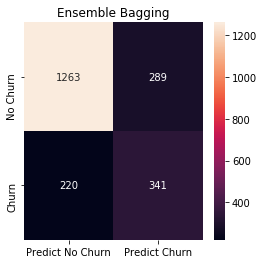

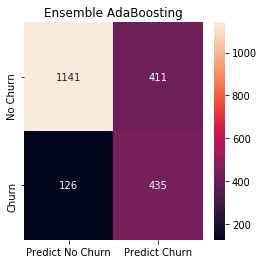

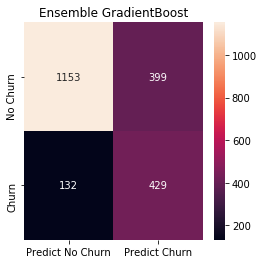

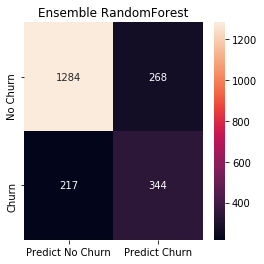

In [72]:
List_1 = []
for m in range(len(models)):
    List_2 = []
    model = models[m][1]
    model.fit(X_train_res,y_train_res.values.ravel())
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train_res)
    cm = confusion_matrix(y_test,y_pred)
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':\n')

    print('Train Accuracy Score: {}'.format(accuracy_score(y_train_res,y_train_pred)))
    print('Test Accuracy Score: {}'.format(accuracy_score(y_test,y_pred)))
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('Precision: {:.2f} %'.format(precision))
    print('Recall: {:.2f} %'.format(recall))
    print('F1 Score: {:.2f} %'.format(f1))
    print(cm)
    
    cm1=metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
    df_cm = pd.DataFrame(cm1, index = [i for i in ['No Churn','Churn']],
                         columns = [i for i in ["Predict No Churn","Predict Churn"]])
    plt.figure(figsize = (4,4))
    plt.title(models[m][0])
    sns.heatmap(df_cm, annot=True, fmt='g');
    
    print(classification_report(y_test, y_pred)) 
    print('-'*60)
    print('')
    List_2.append(models[m][0])
    List_2.append(accuracy_score(y_train_res,y_train_pred)*100)
    List_2.append(accuracy_score(y_test,y_pred)*100)
    List_2.append(roc)
    List_2.append(precision)
    List_2.append(recall)
    List_2.append(f1)
    List_1.append(List_2)

### 1.5.2: Display the classification accuracies for train and test data

In [73]:
resultsDf = pd.DataFrame(List_1,columns=['Model','Train_Accuracy','Test_Accuracy','ROC_AUC','Precision','Recall','F1 Score'])
resultsDf_sorted = resultsDf.sort_values(by=['Recall','F1 Score'],ascending=False)
resultsDf_sorted

,Model,Train_Accuracy,Test_Accuracy,ROC_AUC,Precision,Recall,F1 Score
1,Ensemble AdaBoosting,79.638321,74.585897,0.755291,0.514184,0.775401,0.618337
2,Ensemble GradientBoost,81.170624,74.869853,0.753809,0.518116,0.764706,0.617711
3,Ensemble RandomForest,99.889564,77.046853,0.720255,0.562092,0.613191,0.586530
0,Ensemble Bagging,99.875759,75.911027,0.710816,0.541270,0.607843,0.572628


### Observation: Best Model is AdaBoosting

AdaBoosting is considerd as best model. Because,

1) Recall which tells how many customer churn are predicted correctly with our model. So prediction of customer churn (Recall) is most important parameter to decide the best model for this problem. This model is having highest Recall. Ofcourse Adaboost having same value.

2) Also the Testing Accuracy is also more for AdaBoosting

### 1.5.3: Apply all the possible tuning techniques to train the best model for the given data.
• Suggestion: Use all possible hyper parameter combinations to extract the best accuracies

#### Hyperparameter tuning in AdaBoostClassifier using Gridsearch.

In [74]:
ab_clf = AdaBoostClassifier(random_state=42)
skfold = StratifiedKFold(n_splits=5)
param_grid = {
              'n_estimators' : [25, 50 ,75, 100, 200],
              'learning_rate': [0.005 ,0.05, 0.5, 1.5]
              }
grid_ab_clf = GridSearchCV(ab_clf, param_grid, cv=skfold, scoring="accuracy", n_jobs= -1, verbose = 1)
grid_ab_clf.fit(X_train_res,y_train_res.values.ravel())
print('Best paratmeter for Grid Search Adaboosting Model : {}'.format(grid_ab_clf.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best paratmeter for Grid Search Adaboosting Model : {'learning_rate': 1.5, 'n_estimators': 200}


Grid Search Adaboosting Model :

Train Accuracy Score: 0.8350358917725014
Test Accuracy Score: 0.7501183151916706
ROC AUC Score: 0.74 %
Precision: 0.52 %
Recall: 0.71 %
F1 Score: 0.60 %
[[1184  368]
 [ 160  401]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1552
           1       0.52      0.71      0.60       561

    accuracy                           0.75      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.79      0.75      0.76      2113

------------------------------------------------------------



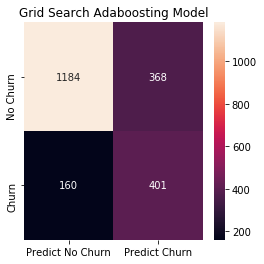

In [75]:
List_2 = []
y_pred = grid_ab_clf.predict(X_test)
y_train_pred = grid_ab_clf.predict(X_train_res)
cm = confusion_matrix(y_test,y_pred)
roc = roc_auc_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print('Grid Search Adaboosting Model',':\n')

print('Train Accuracy Score: {}'.format(accuracy_score(y_train_res,y_train_pred)))
print('Test Accuracy Score: {}'.format(accuracy_score(y_test,y_pred)))
print('ROC AUC Score: {:.2f} %'.format(roc))
print('Precision: {:.2f} %'.format(precision))
print('Recall: {:.2f} %'.format(recall))
print('F1 Score: {:.2f} %'.format(f1))
print(cm)

cm1=metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
df_cm = pd.DataFrame(cm1, index = [i for i in ['No Churn','Churn']],
                     columns = [i for i in ["Predict No Churn","Predict Churn"]])
plt.figure(figsize = (4,4))
plt.title('Grid Search Adaboosting Model')
sns.heatmap(df_cm, annot=True, fmt='g');

print(classification_report(y_test, y_pred)) 
print('-'*60)
print('')
List_2.append('Grid Search Adaboosting Model')
List_2.append(accuracy_score(y_train_res,y_train_pred)*100)
List_2.append(accuracy_score(y_test,y_pred)*100)
List_2.append(roc)
List_2.append(precision)
List_2.append(recall)
List_2.append(f1)
List_1.append(List_2)

#### Hyperparameter tuning in AdaBoostClassifier using Randomserch.

In [76]:
abc_clf = AdaBoostClassifier(random_state=42)
skfold = StratifiedKFold(n_splits=5)
param_grid = {
              'n_estimators' : [25, 50 ,75, 100, 200],
              'learning_rate': [0.005 ,0.05, 0.5, 1.5]
              }
Rand_ab_clf = RandomizedSearchCV(abc_clf, param_grid, cv=skfold, scoring="accuracy", n_jobs= -1, verbose = 1)
Rand_ab_clf.fit(X_train_res,y_train_res.values.ravel())
print('Best paratmeter for Random Search Adaboosting Model : {}'.format(Rand_ab_clf.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best paratmeter for Random Search Adaboosting Model : {'n_estimators': 200, 'learning_rate': 1.5}


Random Search Adaboosting Model :

Train Accuracy Score: 0.8350358917725014
Test Accuracy Score: 0.7501183151916706
ROC AUC Score: 0.74 %
Precision: 0.52 %
Recall: 0.71 %
F1 Score: 0.60 %
[[1184  368]
 [ 160  401]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1552
           1       0.52      0.71      0.60       561

    accuracy                           0.75      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.79      0.75      0.76      2113

------------------------------------------------------------



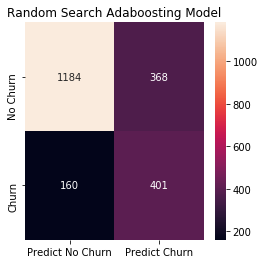

In [77]:
List_2 = []
y_pred = Rand_ab_clf.predict(X_test)
y_train_pred = Rand_ab_clf.predict(X_train_res)
cm = confusion_matrix(y_test,y_pred)
roc = roc_auc_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print('Random Search Adaboosting Model',':\n')

print('Train Accuracy Score: {}'.format(accuracy_score(y_train_res,y_train_pred)))
print('Test Accuracy Score: {}'.format(accuracy_score(y_test,y_pred)))
print('ROC AUC Score: {:.2f} %'.format(roc))
print('Precision: {:.2f} %'.format(precision))
print('Recall: {:.2f} %'.format(recall))
print('F1 Score: {:.2f} %'.format(f1))
print(cm)

cm1=metrics.confusion_matrix(y_test, y_pred, labels=[0,1])
df_cm = pd.DataFrame(cm1, index = [i for i in ['No Churn','Churn']],
                     columns = [i for i in ["Predict No Churn","Predict Churn"]])
plt.figure(figsize = (4,4))
plt.title('Random Search Adaboosting Model')
sns.heatmap(df_cm, annot=True, fmt='g');

print(classification_report(y_test, y_pred)) 
print('-'*60)
print('')
List_2.append('Random Search Adaboosting Model')
List_2.append(accuracy_score(y_train_res,y_train_pred)*100)
List_2.append(accuracy_score(y_test,y_pred)*100)
List_2.append(roc)
List_2.append(precision)
List_2.append(recall)
List_2.append(f1)
List_1.append(List_2)

### 1.5.4: Display and compare all the models designed with their train and test accuracies

In [78]:
resultsDf1 = pd.DataFrame(List_1,columns=['Model','Train_Accuracy','Test_Accuracy','ROC_AUC','Precision','Recall','F1 Score'])
resultsDf_sorted1 = resultsDf1.sort_values(by=['Recall','F1 Score'],ascending=False)
resultsDf_sorted1

,Model,Train_Accuracy,Test_Accuracy,ROC_AUC,Precision,Recall,F1 Score
1,Ensemble AdaBoosting,79.638321,74.585897,0.755291,0.514184,0.775401,0.618337
2,Ensemble GradientBoost,81.170624,74.869853,0.753809,0.518116,0.764706,0.617711
4,Grid Search Adaboosting Model,83.503589,75.011832,0.738841,0.521456,0.714795,0.603008
5,Random Search Adaboosting Model,83.503589,75.011832,0.738841,0.521456,0.714795,0.603008
3,Ensemble RandomForest,99.889564,77.046853,0.720255,0.562092,0.613191,0.586530
0,Ensemble Bagging,99.875759,75.911027,0.710816,0.541270,0.607843,0.572628


### 1.5.5: Select the final best trained model along with your detailed comments for selecting this model

### Observation : Best Model is Base AdaBossting with Recall of 77.75%

After fine tuning the hyperparameters,

1) We can see that there is no improvement in recall, ROC and F1 score for Hypertuned models with GRID and Random Search with best hyper parameters

2) Testing Accuracy of Hypertuned mmodel is slightly more in comparison to Base AdaBoosting Model. But in this Churn case Recall is more importamt factor to check the best model.

So Base model is our final model for future prediction, which is able to predict customer churn with 76.67 % accuracy and recall with 77.54 %

### 1.5.5: Pickle the selected model for future use

**Pickling**: It is a process where a Python object hierarchy is converted into a byte stream and dumps it into a file by using dump function.This character stream contains all the information necessary to reconstruct the object in another python script.

**Pickle** has two main methods i.e. Load and Dump. 

The first one is **Dump**, which dumps an object to a file object and the second one is **Load**, which loads an object from a file object.

**Purpose** of the pickling is to freeze the final model, Package it, can be shared with anyone who wants to use the pickle file ot predict the something out of the model.

In [79]:
# Final model (which is Base model)

ABClassifier = AdaBoostClassifier()
ABClassifier.fit(X_train_res,y_train_res.values.ravel())
y_pred = ABClassifier.predict(X_test)
pred_train = ABClassifier.predict(X_train_res)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1552
           1       0.51      0.78      0.62       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.75      0.76      2113



In [80]:
# Import pickle Package

import pickle

# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_ABC_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(ABClassifier, file)

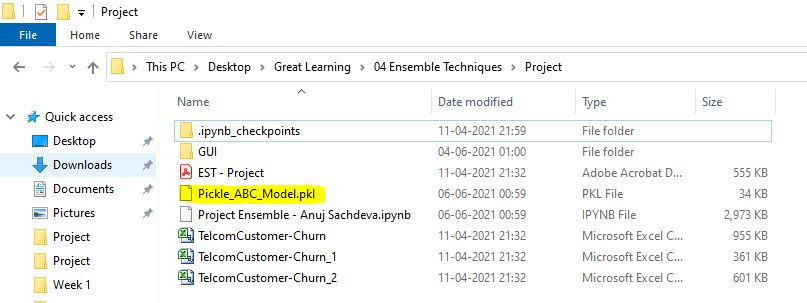

In [2]:
# Load the Model back from file

with open(Pkl_Filename, 'rb') as file:  
    Pickle_ABC_Model = pickle.load(file)
    
Pickle_ABC_Model

NameError: name 'Pkl_Filename' is not defined

### 1.6. -  GUI development

### 1.6.1 - Design a clickable GUI desk application or web service application

### 1.6.2 - This GUI should allow the user to input all future values and on a click use these values on the trained model above to predict

### 1.6.3. - It should display the prediction

In [3]:
# import everything from tkinter module 
import tkinter as tk
from tkinter import ttk as TTK
import pandas as pd
import numpy as nm
import re
from tkinter import *
from tkinter.ttk import *
    
# Import pickle Package

import pickle

def Submit():
    
    # Globally decalre the DB variable for final use model prediction
    global DB
    
    DF = pd.DataFrame()
    DF = pd.DataFrame(columns=['Gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines',
                               'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                               'StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges'])
    Gender=Gender_var.get() 
    DF.loc[0,'Gender']=Gender
    
    SeniorCitizen=SeniorCitizen_var.get()
    DF.loc[0,'SeniorCitizen']=SeniorCitizen
    
    Partner=Partner_var.get()
    DF.loc[0,'Partner']=Partner
    
    Dependents=Dependents_var.get()
    DF.loc[0,'Dependents']=Dependents
    
    tenure=tenure_var.get()
    DF.loc[0,'tenure']=tenure
    
    PhoneService=PhoneService_var.get()
    DF.loc[0,'PhoneService']=PhoneService
    
    MultipleLines=MultipleLines_var.get()
    DF.loc[0,'MultipleLines']=MultipleLines
    
    InternetService=InternetService_var.get()
    DF.loc[0,'InternetService']=InternetService
    
    OnlineSecurity=OnlineSecurity_var.get()
    DF.loc[0,'OnlineSecurity']=OnlineSecurity
    
    OnlineBackup=OnlineBackup_var.get()
    DF.loc[0,'OnlineBackup']=OnlineBackup
    
    DeviceProtection=DeviceProtection_var.get()
    DF.loc[0,'DeviceProtection']=DeviceProtection
    
    TechSupport=TechSupport_var.get()
    DF.loc[0,'TechSupport']=TechSupport
    
    StreamingTV=StreamingTV_var.get()
    DF.loc[0,'StreamingTV']=StreamingTV
    
    StreamingMovies=StreamingMovies_var.get()
    DF.loc[0,'StreamingMovies']=StreamingMovies
    
    Contract=Contract_var.get()
    DF.loc[0,'Contract']=Contract
    
    PaperlessBilling=PaperlessBilling_var.get()
    DF.loc[0,'PaperlessBilling']=PaperlessBilling
    
    PaymentMethod=PaymentMethod_var.get()
    DF.loc[0,'PaymentMethod']=PaymentMethod
    
    MonthlyCharges=MonthlyCharges_var.get()
    DF.loc[0,'MonthlyCharges']=MonthlyCharges
    
    TotalCharges=TotalCharges_var.get()
    DF.loc[0,'TotalCharges']=TotalCharges
    
    DB=DF
    
    
def Predict():
    
    # Globally decalre the DB variable for final use model prediction
    global DB
    
    DB["tenure"] = pd.to_numeric(DB["tenure"])
    DB["MonthlyCharges"] = pd.to_numeric(DB["MonthlyCharges"])
    DB["TotalCharges"] = pd.to_numeric(DB["TotalCharges"])
    
    # Convert the Object variables into Categorical
    
    for col in DB.columns: # Loop through all columns in the dataframe
        if DB[col].dtype == 'object': # Only apply for columns with categorical strings
            DB[col] = pd.Categorical(DB[col]) # Replace strings with an integer

    # Create a structure for replace for categorical variables

    replaceStruct = {
                "Gender":           {"Male": 1, "Female": 2},
                "Partner":          {"No": 0, "Yes": 1 },
                "Dependents":       {"No": 0, "Yes": 1 },
                "PhoneService":     {"No": 0, "Yes": 1 },
                "MultipleLines":    {"No phone service": -1, "No": 0, "Yes": 1},
                "InternetService":  {"No": 0, "DSL": 1, "Fiber optic": 2},
                "OnlineSecurity":   {"No internet service": -1, "No": 0, "Yes": 1 },
                "OnlineBackup":     {"No internet service": -1, "No": 0, "Yes": 1 },
                "DeviceProtection": {"No internet service": -1, "No": 0, "Yes": 1 },
                "TechSupport":      {"No internet service": -1, "No": 0, "Yes": 1 },
                "StreamingTV":      {"No internet service": -1, "No": 0, "Yes": 1 },
                "StreamingMovies":  {"No internet service": -1, "No": 0, "Yes": 1 },
                "PaperlessBilling": {"No": 0, "Yes": 1 },
                    }
            
    DB=DB.replace(replaceStruct)
    
    list1 = [1]
    list2= [0]
    
    if (DB['Contract'].item() == 'Month-to-month'):
        DB['Contract_Month-to-month'] = list1
        DB['Contract_One year'] = list2
        DB['Contract_Two year'] = list2
        DB.drop(['Contract'],axis=1,inplace=True)
    elif (DB['Contract'].item() == 'One year'):
        DB['Contract_Month-to-month'] = list2
        DB['Contract_One year'] = list1
        DB['Contract_Two year'] = list2
        DB.drop(['Contract'],axis=1,inplace=True)
    elif (DB['Contract'].item() == 'Two year'):
        DB['Contract_Month-to-month'] = list2
        DB['Contract_One year'] = list2
        DB['Contract_Two year'] = list1
        DB.drop(['Contract'],axis=1,inplace=True)
    
    if DB['PaymentMethod'].item() == 'Bank transfer (automatic)':
        DB['PaymentMethod_Bank transfer (automatic)'] = list1
        DB['PaymentMethod_Credit card (automatic)'] = list2
        DB['PaymentMethod_Electronic check'] = list2
        DB['PaymentMethod_Mailed check'] = list2
        DB.drop(['PaymentMethod'],axis=1,inplace=True)
    elif DB['PaymentMethod'].item() == 'Credit card (automatic)':
        DB['PaymentMethod_Bank transfer (automatic)'] = list2
        DB['PaymentMethod_Credit card (automatic)'] = list1
        DB['PaymentMethod_Electronic check'] = list2
        DB['PaymentMethod_Mailed check'] = list2
        DB.drop(['PaymentMethod'],axis=1,inplace=True)
    elif DB['PaymentMethod'].item() == 'Electronic check':
        DB['PaymentMethod_Bank transfer (automatic)'] = list2
        DB['PaymentMethod_Credit card (automatic)'] = list2
        DB['PaymentMethod_Electronic check'] = list1
        DB['PaymentMethod_Mailed check'] = list2
        DB.drop(['PaymentMethod'],axis=1,inplace=True)
    elif DB['PaymentMethod'].item() == 'Mailed check':
        DB['PaymentMethod_Bank transfer (automatic)'] = list2
        DB['PaymentMethod_Credit card (automatic)'] = list2
        DB['PaymentMethod_Electronic check'] = list2
        DB['PaymentMethod_Mailed check'] = list1
        DB.drop(['PaymentMethod'],axis=1,inplace=True)
    
    # Pickle model File Name
    
    Pkl_Filename = "Pickle_ABC_Model.pkl"  
    
    # Load the Model back from file

    with open(Pkl_Filename, 'rb') as file:  
        Pickle_ABC_Model = pickle.load(file)
    
    y_pred = Pickle_ABC_Model.predict(DB)
    
    # when the prediction is 0 it means Customer will not Churn and if the prediction is 1 it menas Customer will Churn
    
    if y_pred.item() == 0:
        Prediction_var.set('Not Churn')
    elif y_pred.item() == 1:
        Prediction_var.set('Churn')
        
    

# Driver code 
if __name__ == "__main__": 
    
    # Globally decalre the DB variable for final use model prediction
    global DB
    
    # create a GUI window 
    gui = tk.Tk() 
 
    # set the title of GUI window 
    gui.title("Predict if the Customer will Churn or not") 
 
    # set the configuration of GUI window 
    gui.geometry("300x500") 
 
    # Create the Label for gender
    Gender = TTK.Label(gui,text="Gender")
    Gender.grid(row=0,column=0,sticky=tk.W)
    
    # Create the Combobox for Gender
    Gender_var = tk.StringVar()
    Gender_combobox = TTK.Combobox(gui, textvariable=Gender_var)
    Gender_combobox['values'] = ('Male','Female')
    Gender_combobox.grid(row=0,column=1)
    
    # Create the Label for SeniorCitizen
    SeniorCitizen = TTK.Label(gui,text="Senior Citizen")
    SeniorCitizen.grid(row=1,column=0,sticky=tk.W)
    
    # Create the Combobox for SeniorCitizen
    SeniorCitizen_var = tk.StringVar()
    SeniorCitizen_combobox = TTK.Combobox(gui, textvariable=SeniorCitizen_var)
    SeniorCitizen_combobox['values'] = ('0','1')
    SeniorCitizen_combobox.grid(row=1,column=1)
    
    # Create the Label for Partner
    Partner = TTK.Label(gui,text="Partner")
    Partner.grid(row=2,column=0,sticky=tk.W)
    
    # Create the Combobox for Partner
    Partner_var = tk.StringVar()
    Partner_combobox = TTK.Combobox(gui, textvariable=Partner_var)
    Partner_combobox['values'] = ('No','Yes')
    Partner_combobox.grid(row=2,column=1)
    
    # Create the Label for Dependents
    Dependents = TTK.Label(gui,text="Dependents")
    Dependents.grid(row=3,column=0,sticky=tk.W)
    
    # Create the Combobox for Dependents
    Dependents_var = tk.StringVar()
    Dependents_combobox = TTK.Combobox(gui, textvariable=Dependents_var)
    Dependents_combobox['values'] = ('No','Yes')
    Dependents_combobox.grid(row=3,column=1)
    
    # Create the Label for Tenure
    tenure = TTK.Label(gui,text="Tenure")
    tenure.grid(row=4,column=0,sticky=tk.W)
    
    # Create the Combobox for Tenure
    tenure_var = tk.StringVar()
    tenure_entrybox = TTK.Entry(gui, textvariable = tenure_var)
    tenure_entrybox.grid(row=4,column=1)
    
    # Create the Label for PhoneService
    PhoneService = TTK.Label(gui,text="Phone Service")
    PhoneService.grid(row=5,column=0,sticky=tk.W)
    
    # Create the Combobox for PhoneService
    PhoneService_var = tk.StringVar()
    PhoneService_combobox = TTK.Combobox(gui, textvariable=PhoneService_var)
    PhoneService_combobox['values'] = ('No','Yes')
    PhoneService_combobox.grid(row=5,column=1)
    
    # Create the Label for MultipleLines
    MultipleLines = TTK.Label(gui,text="Multiple Lines")
    MultipleLines.grid(row=6,column=0,sticky=tk.W)
    
    # Create the Combobox for MultipleLines
    MultipleLines_var = tk.StringVar()
    MultipleLines_combobox = TTK.Combobox(gui, textvariable=MultipleLines_var)
    MultipleLines_combobox['values'] = ('No phone service','No','Yes')
    MultipleLines_combobox.grid(row=6,column=1)
    
    # Create the Label for InternetService
    InternetService = TTK.Label(gui,text="Internet Service")
    InternetService.grid(row=7,column=0,sticky=tk.W)
    
    # Create the Combobox for InternetService
    InternetService_var = tk.StringVar()
    InternetService_combobox = TTK.Combobox(gui, textvariable=InternetService_var)
    InternetService_combobox['values'] = ('No','DSL','Fiber optic')
    InternetService_combobox.grid(row=7,column=1)
    
    # Create the Label for OnlineSecurity
    OnlineSecurity = TTK.Label(gui,text="Online Security")
    OnlineSecurity.grid(row=8,column=0,sticky=tk.W)
    
    # Create the Combobox for OnlineSecurity
    OnlineSecurity_var = tk.StringVar()
    OnlineSecurity_combobox = TTK.Combobox(gui, textvariable=OnlineSecurity_var)
    OnlineSecurity_combobox['values'] = ('No internet service','No','Yes')
    OnlineSecurity_combobox.grid(row=8,column=1)
    
    # Create the Label for OnlineBackup
    OnlineBackup = TTK.Label(gui,text="Online Backup")
    OnlineBackup.grid(row=9,column=0,sticky=tk.W)
    
    # Create the Combobox for OnlineBackup
    OnlineBackup_var = tk.StringVar()
    OnlineBackup_combobox = TTK.Combobox(gui, textvariable=OnlineBackup_var)
    OnlineBackup_combobox['values'] = ('No internet service','No','Yes')
    OnlineBackup_combobox.grid(row=9,column=1)
    
    # Create the Label for DeviceProtection
    DeviceProtection = TTK.Label(gui,text="Device Protection")
    DeviceProtection.grid(row=10,column=0,sticky=tk.W)
    
    # Create the Combobox for DeviceProtection
    DeviceProtection_var = tk.StringVar()
    DeviceProtection_combobox = TTK.Combobox(gui, textvariable=DeviceProtection_var)
    DeviceProtection_combobox['values'] = ('No internet service','No','Yes')
    DeviceProtection_combobox.grid(row=10,column=1)
    
    # Create the Label for TechSupport
    TechSupport = TTK.Label(gui,text="Tech Support")
    TechSupport.grid(row=11,column=0,sticky=tk.W)
    
    # Create the Combobox for TechSupport
    TechSupport_var = tk.StringVar()
    TechSupport_combobox = TTK.Combobox(gui, textvariable=TechSupport_var)
    TechSupport_combobox['values'] = ('No internet service','No','Yes')
    TechSupport_combobox.grid(row=11,column=1)
    
    # Create the Label for StreamingTV
    StreamingTV = TTK.Label(gui,text="Streaming TV")
    StreamingTV.grid(row=12,column=0,sticky=tk.W)
    
    # Create the Combobox for StreamingTV
    StreamingTV_var = tk.StringVar()
    StreamingTV_combobox = TTK.Combobox(gui, textvariable=StreamingTV_var)
    StreamingTV_combobox['values'] = ('No internet service','No','Yes')
    StreamingTV_combobox.grid(row=12,column=1)
    
    # Create the Label for StreamingMovies
    StreamingMovies = TTK.Label(gui,text="Streaming Movies")
    StreamingMovies.grid(row=13,column=0,sticky=tk.W)
    
    # Create the Combobox for StreamingMovies
    StreamingMovies_var = tk.StringVar()
    StreamingMovies_combobox = TTK.Combobox(gui, textvariable=StreamingMovies_var)
    StreamingMovies_combobox['values'] = ('No internet service','No','Yes')
    StreamingMovies_combobox.grid(row=13,column=1)
    
    # Create the Label for Contract
    Contract = TTK.Label(gui,text="Contract")
    Contract.grid(row=14,column=0,sticky=tk.W)
    
    # Create the Combobox for Contract
    Contract_var = tk.StringVar()
    Contract_combobox = TTK.Combobox(gui, textvariable=Contract_var)
    Contract_combobox['values'] = ('Month-to-month','One year','Two year')
    Contract_combobox.grid(row=14,column=1)
    
    # Create the Label for PaperlessBilling
    PaperlessBilling = TTK.Label(gui,text="Paperless Billing")
    PaperlessBilling.grid(row=15,column=0,sticky=tk.W)
    
    # Create the Combobox for PaperlessBilling
    PaperlessBilling_var = tk.StringVar()
    PaperlessBilling_combobox = TTK.Combobox(gui, textvariable=PaperlessBilling_var)
    PaperlessBilling_combobox['values'] = ('No','Yes')
    PaperlessBilling_combobox.grid(row=15,column=1)
    
    # Create the Label for PaymentMethod
    PaymentMethod = TTK.Label(gui,text="Payment Method")
    PaymentMethod.grid(row=16,column=0,sticky=tk.W)
    
    # Create the Combobox for PaymentMethod
    PaymentMethod_var = tk.StringVar()
    PaymentMethod_combobox = TTK.Combobox(gui, textvariable=PaymentMethod_var)
    PaymentMethod_combobox['values'] = ('Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)')
    PaymentMethod_combobox.grid(row=16,column=1)
    
    # Create the Label for MonthlyCharges
    MonthlyCharges = TTK.Label(gui,text="Monthly Charges")
    MonthlyCharges.grid(row=17,column=0,sticky=tk.W)
    
    # Create the Entrybox for MonthlyCharges
    MonthlyCharges_var = tk.StringVar()
    MonthlyCharges_entrybox = TTK.Entry(gui, textvariable = MonthlyCharges_var)
    MonthlyCharges_entrybox.grid(row=17,column=1)
    
    # Create the Label for TotalCharges
    TotalCharges = TTK.Label(gui,text="Total Charges")
    TotalCharges.grid(row=18,column=0,sticky=tk.W)
    
    # Create the Entrybox for TotalCharges
    TotalCharges_var = tk.StringVar()
    TotalCharges_entrybox = TTK.Entry(gui, textvariable = TotalCharges_var)
    TotalCharges_entrybox.grid(row=18,column=1)
    
    # Create Submit button
    Submit_button = Button(gui, text='Submit', command=lambda: Submit()) 
    Submit_button.grid(row=19, column=0)
    
    # Create Predict button
    Predict_button = Button(gui, text='Predict', command=lambda: Predict()) 
    Predict_button.grid(row=20, column=0)
    
    # Create the Entrybox for Prediction (Churn or Not Churn)
    Prediction_var = tk.StringVar()
    Prediction_entrybox = TTK.Entry(gui, textvariable = Prediction_var)
    Prediction_entrybox.grid(row=20,column=1)
    
    gui.mainloop() 

**Screenshot for Screen without values**

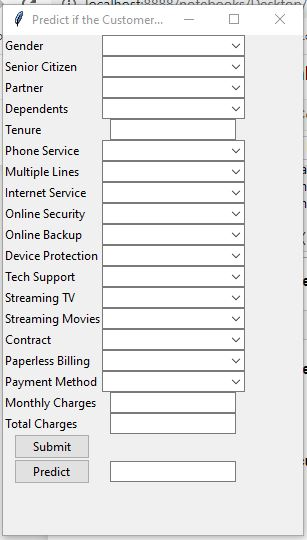

**Screenshot when customer is Churn out**

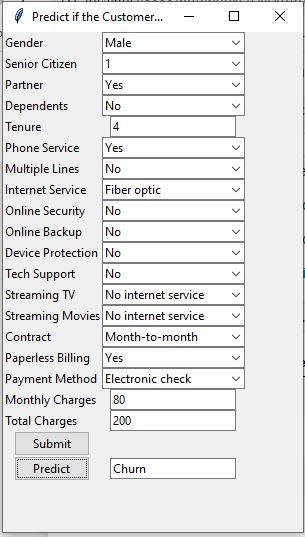

**Screenshot when customer is Not Churn out**

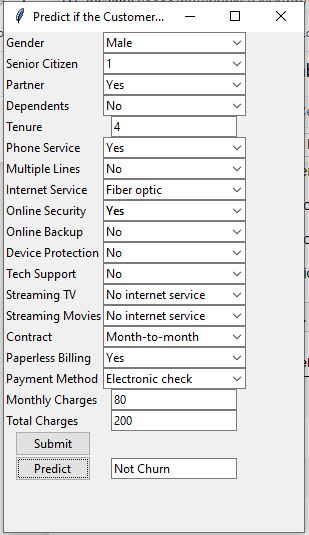

### 1.7. -  Conclusion and improvisation:

### 1.7.1 - Write your conclusion on the results

In [82]:
resultsDf_sorted1

,Model,Train_Accuracy,Test_Accuracy,ROC_AUC,Precision,Recall,F1 Score
1,Ensemble AdaBoosting,79.638321,74.585897,0.755291,0.514184,0.775401,0.618337
2,Ensemble GradientBoost,81.170624,74.869853,0.753809,0.518116,0.764706,0.617711
4,Grid Search Adaboosting Model,83.503589,75.011832,0.738841,0.521456,0.714795,0.603008
5,Random Search Adaboosting Model,83.503589,75.011832,0.738841,0.521456,0.714795,0.603008
3,Ensemble RandomForest,99.889564,77.046853,0.720255,0.562092,0.613191,0.586530
0,Ensemble Bagging,99.875759,75.911027,0.710816,0.541270,0.607843,0.572628


### Conclusion

1. **AdaBoostClassifier** model performs the best basis on the Recall factor as seen above.

2. **AdaBoostClassifier** model is able to predict 77.5 % of customer churn.

3. Observed no improvement with tuning hyperparameters.

4. We may improve model performance by using other classification algorithms.

5. We have dropped customer ID (as it will not influence ).

6. Area under the Curve is 75.5% and it is also more in comparision to other models

#### Handling of imbalanced data via SMOTE:

Most of the ML models works best when the number of classes are in equal proportion since they are designed to maximize accuracy and reduce error. Thus, they do not take into account the class distribution / proportion or balance of classes. In our dataset, the customer who churned out are 26.5 % and whho did not churn out are 73.5%.

Since the Data was imbalanced for both the classes, We chose **Oversampling**, which is one of common ways to tackle the issue of imbalanced data. Over-sampling refers to various methods that aim to increase the number of instances from the underrepresented class in the data set. Out of the various methods, we chose **Synthetic Minority Over-Sampling Technique (SMOTE)**. SMOTE’s main advantage compared to traditional random naive over-sampling is that by creating synthetic observations instead of reusing existing observations, classifier is less likely to overfit.

#### Company must focus more on below points for customer retention

1) Why month to month contract customers churn out is more. - Company can provide benifits or offers or discounts on yeearly and 2 yearly plan for the customers so that they are tied with company for the longer period of time. Also if there are compaints then they should be resolved on time.

2) Why Electronic Payment Mehtod Customers churn out is more. - Company can check if there is any issue while making the Electronic payments

3) Why Customer churn out is more for when customers have enrolled for Fiber Optic. - Company can check if there are issues related to Fiber Optic as the churn out is more.

4) Company can focus on the customer whose tenure is between 0 and 5

5) Company can focus on the customer whose Monthly charges are betwween 65 and 110

6) Company can focus on the customers whose Total charges are between 0 to 400

#### Target Customers as per the analysis:

Total target Customers are 148 which can be reached to understand if they are getting any issues or not. 

Out of 148, Frequencey of Month-to-month Customer is 145.

Out of 148, Frequencey of Electronic check payment method Customer is 95.

Also the Phone service for these customer is YES 

In [52]:
Target_Customers.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
31,1,1,1,0,2,1,0,2,0,0,1,0,1,1,Month-to-month,1,Credit card (automatic),95.50,181.65,0
65,2,0,0,0,3,1,0,1,0,1,0,1,1,1,Month-to-month,1,Electronic check,75.30,244.10,0
91,1,1,0,0,1,1,0,2,0,0,0,1,0,0,Month-to-month,0,Electronic check,74.70,74.70,0
115,1,0,1,1,3,1,0,2,1,1,0,0,1,0,Month-to-month,0,Electronic check,89.85,248.40,0
162,2,0,0,0,2,1,0,2,0,0,0,0,0,0,Month-to-month,1,Electronic check,69.70,135.20,0


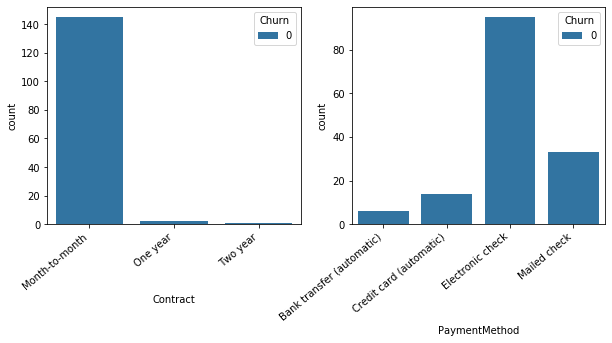

In [54]:
# Count Plot for Contract and PaymentMethod

fig = plt.figure(figsize = (10,4))

ax = plt.subplot(1, 2, 1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.countplot(Target_Customers.Contract, hue=Target_Customers.Churn, ax=ax);

ax = plt.subplot(1, 2, 2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.countplot(Target_Customers.PaymentMethod, hue=Target_Customers.Churn, ax=ax);

plt.show()

### 1.7.2 - Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the telecom operator to perform a better data analysis in future

#### From the Below Countplot graph, 

We can see that **84% of customers are not senior citizens** and we have also seen before that churn out is more from these customers. **There is no information of age or age group (teen, young, middle age).**

**Information on age help us to perform better analysis and will increase the focus on particular group.**

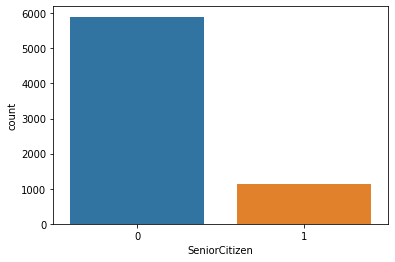

Senior Citizen = 1 are 16.21468124378816 %
Senior Citizen = 0 are 83.78531875621185 %


In [84]:
sns.countplot(data = Tel_Customer_Churn, x= 'SeniorCitizen')
plt.show()
print('Senior Citizen = 1 are {} %'.format(len(Tel_Customer_Churn[Tel_Customer_Churn.SeniorCitizen == 1])/len(Tel_Customer_Churn)*100))
print('Senior Citizen = 0 are {} %'.format(len(Tel_Customer_Churn[Tel_Customer_Churn.SeniorCitizen == 0])/len(Tel_Customer_Churn)*100))

=============================================== END =================================================================